In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('Future_sales_train.csv')

In [3]:
train.head(10)

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
0,PROD_3,SLSMAN_1,10,2019,80,0
1,PROD_3,SLSMAN_1,11,2019,80,0
2,PROD_3,SLSMAN_1,12,2019,40,0
3,PROD_5,SLSMAN_1,10,2019,160,211
4,PROD_5,SLSMAN_1,11,2019,160,173
5,PROD_5,SLSMAN_1,12,2019,240,175
6,PROD_8,SLSMAN_1,10,2019,0,7
7,PROD_10,SLSMAN_1,10,2019,0,82
8,PROD_10,SLSMAN_1,11,2019,0,79
9,PROD_10,SLSMAN_1,12,2019,0,59


In [4]:
train.shape

(22469, 6)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22469 entries, 0 to 22468
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PROD_CD       22469 non-null  object
 1   SLSMAN_CD     22469 non-null  object
 2   PLAN_MONTH    22469 non-null  int64 
 3   PLAN_YEAR     22469 non-null  int64 
 4   TARGET_IN_EA  22469 non-null  object
 5   ACH_IN_EA     22469 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.0+ MB


In [6]:
train.describe()

,PLAN_MONTH,PLAN_YEAR
count,22469.000000,22469.0
mean,11.039744,2019.0
std,0.800889,0.0
min,10.000000,2019.0
25%,10.000000,2019.0
50%,11.000000,2019.0
75%,12.000000,2019.0
max,12.000000,2019.0


In [7]:
train.isnull().sum()

PROD_CD         0
SLSMAN_CD       0
PLAN_MONTH      0
PLAN_YEAR       0
TARGET_IN_EA    0
ACH_IN_EA       0
dtype: int64

In [8]:
train['SLSMAN_CD'].value_counts()

SLSMAN_62     157
SLSMAN_138    151
SLSMAN_19     142
SLSMAN_58     141
SLSMAN_99     140
             ... 
SLSMAN_203     15
SLSMAN_77       7
SLSMAN_55       5
SLSMAN_78       2
SLSMAN_167      2
Name: SLSMAN_CD, Length: 224, dtype: int64

In [9]:
train['PROD_CD'].value_counts()

PROD_50    590
PROD_47    582
PROD_59    572
PROD_15    569
PROD_14    568
          ... 
PROD_29      2
PROD_49      1
PROD_72      1
PROD_24      1
PROD_65      1
Name: PROD_CD, Length: 86, dtype: int64

# Column transformation

In [10]:
labels = train['PROD_CD'].astype('category').cat.categories.tolist()
replace_pd = {'PROD_CD':{k: v for k, v in zip(labels,list(range(1,len(labels)+1)))}}
replace_pd

{'PROD_CD': {'PROD_1': 1,
  'PROD_10': 2,
  'PROD_11': 3,
  'PROD_12': 4,
  'PROD_13': 5,
  'PROD_14': 6,
  'PROD_15': 7,
  'PROD_16': 8,
  'PROD_17': 9,
  'PROD_18': 10,
  'PROD_19': 11,
  'PROD_2': 12,
  'PROD_20': 13,
  'PROD_21': 14,
  'PROD_22': 15,
  'PROD_23': 16,
  'PROD_24': 17,
  'PROD_25': 18,
  'PROD_26': 19,
  'PROD_27': 20,
  'PROD_28': 21,
  'PROD_29': 22,
  'PROD_3': 23,
  'PROD_30': 24,
  'PROD_31': 25,
  'PROD_32': 26,
  'PROD_33': 27,
  'PROD_34': 28,
  'PROD_35': 29,
  'PROD_36': 30,
  'PROD_37': 31,
  'PROD_38': 32,
  'PROD_39': 33,
  'PROD_4': 34,
  'PROD_40': 35,
  'PROD_41': 36,
  'PROD_42': 37,
  'PROD_43': 38,
  'PROD_44': 39,
  'PROD_45': 40,
  'PROD_46': 41,
  'PROD_47': 42,
  'PROD_48': 43,
  'PROD_49': 44,
  'PROD_5': 45,
  'PROD_50': 46,
  'PROD_51': 47,
  'PROD_52': 48,
  'PROD_53': 49,
  'PROD_54': 50,
  'PROD_55': 51,
  'PROD_56': 52,
  'PROD_57': 53,
  'PROD_58': 54,
  'PROD_59': 55,
  'PROD_6': 56,
  'PROD_60': 57,
  'PROD_61': 58,
  'PROD_62': 59,
 

In [11]:
labels = train['SLSMAN_CD'].astype('category').cat.categories.tolist()
replace_sm = {'SLSMAN_CD':{k: v for k, v in zip(labels,list(range(1,len(labels)+1)))}}
replace_sm

{'SLSMAN_CD': {'SLSMAN_1': 1,
  'SLSMAN_10': 2,
  'SLSMAN_100': 3,
  'SLSMAN_101': 4,
  'SLSMAN_102': 5,
  'SLSMAN_103': 6,
  'SLSMAN_104': 7,
  'SLSMAN_105': 8,
  'SLSMAN_106': 9,
  'SLSMAN_107': 10,
  'SLSMAN_108': 11,
  'SLSMAN_109': 12,
  'SLSMAN_11': 13,
  'SLSMAN_110': 14,
  'SLSMAN_111': 15,
  'SLSMAN_112': 16,
  'SLSMAN_113': 17,
  'SLSMAN_114': 18,
  'SLSMAN_115': 19,
  'SLSMAN_116': 20,
  'SLSMAN_117': 21,
  'SLSMAN_118': 22,
  'SLSMAN_119': 23,
  'SLSMAN_12': 24,
  'SLSMAN_120': 25,
  'SLSMAN_121': 26,
  'SLSMAN_122': 27,
  'SLSMAN_123': 28,
  'SLSMAN_124': 29,
  'SLSMAN_125': 30,
  'SLSMAN_126': 31,
  'SLSMAN_127': 32,
  'SLSMAN_128': 33,
  'SLSMAN_129': 34,
  'SLSMAN_13': 35,
  'SLSMAN_130': 36,
  'SLSMAN_131': 37,
  'SLSMAN_132': 38,
  'SLSMAN_133': 39,
  'SLSMAN_134': 40,
  'SLSMAN_135': 41,
  'SLSMAN_136': 42,
  'SLSMAN_137': 43,
  'SLSMAN_138': 44,
  'SLSMAN_139': 45,
  'SLSMAN_14': 46,
  'SLSMAN_140': 47,
  'SLSMAN_141': 48,
  'SLSMAN_142': 49,
  'SLSMAN_143': 50,
  '

In [12]:
train1 = train.copy()

In [13]:
train1.replace(replace_pd,inplace=True)
print(train1.head(10))

   PROD_CD SLSMAN_CD  PLAN_MONTH  PLAN_YEAR TARGET_IN_EA ACH_IN_EA
0       23  SLSMAN_1          10       2019           80         0
1       23  SLSMAN_1          11       2019           80         0
2       23  SLSMAN_1          12       2019           40         0
3       45  SLSMAN_1          10       2019          160       211
4       45  SLSMAN_1          11       2019          160       173
5       45  SLSMAN_1          12       2019          240       175
6       78  SLSMAN_1          10       2019            0         7
7        2  SLSMAN_1          10       2019            0        82
8        2  SLSMAN_1          11       2019            0        79
9        2  SLSMAN_1          12       2019            0        59


In [14]:
train1.replace(replace_sm,inplace=True)
print(train1.head(10))

   PROD_CD  SLSMAN_CD  PLAN_MONTH  PLAN_YEAR TARGET_IN_EA ACH_IN_EA
0       23          1          10       2019           80         0
1       23          1          11       2019           80         0
2       23          1          12       2019           40         0
3       45          1          10       2019          160       211
4       45          1          11       2019          160       173
5       45          1          12       2019          240       175
6       78          1          10       2019            0         7
7        2          1          10       2019            0        82
8        2          1          11       2019            0        79
9        2          1          12       2019            0        59


In [15]:
#### We have to change the string format into integer for 'target_in_ea' ach_in_ea' and 'column also 

In [16]:
train1['TARGET_IN_EA']= train1['TARGET_IN_EA'].str.replace(',','').astype(int)

In [17]:
train1['ACH_IN_EA']= train1['ACH_IN_EA'].str.replace(',','').astype(int)

In [18]:
train1.head(10)

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
0,23,1,10,2019,80,0
1,23,1,11,2019,80,0
2,23,1,12,2019,40,0
3,45,1,10,2019,160,211
4,45,1,11,2019,160,173
5,45,1,12,2019,240,175
6,78,1,10,2019,0,7
7,2,1,10,2019,0,82
8,2,1,11,2019,0,79
9,2,1,12,2019,0,59


In [19]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22469 entries, 0 to 22468
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   PROD_CD       22469 non-null  int64
 1   SLSMAN_CD     22469 non-null  int64
 2   PLAN_MONTH    22469 non-null  int64
 3   PLAN_YEAR     22469 non-null  int64
 4   TARGET_IN_EA  22469 non-null  int32
 5   ACH_IN_EA     22469 non-null  int32
dtypes: int32(2), int64(4)
memory usage: 877.8 KB


In [20]:
train1.describe()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
count,22469.000000,22469.000000,22469.000000,22469.0,22469.000000,22469.000000
mean,35.109529,110.290578,11.039744,2019.0,3790.074058,3714.193244
std,23.665013,66.624366,0.800889,0.0,10792.649817,10608.964868
min,1.000000,1.000000,10.000000,2019.0,0.000000,0.000000
25%,15.000000,50.000000,10.000000,2019.0,12.000000,70.000000
50%,31.000000,106.000000,11.000000,2019.0,252.000000,323.000000
75%,52.000000,168.000000,12.000000,2019.0,2208.000000,2124.000000
max,86.000000,224.000000,12.000000,2019.0,302400.000000,295578.000000


# Visualization

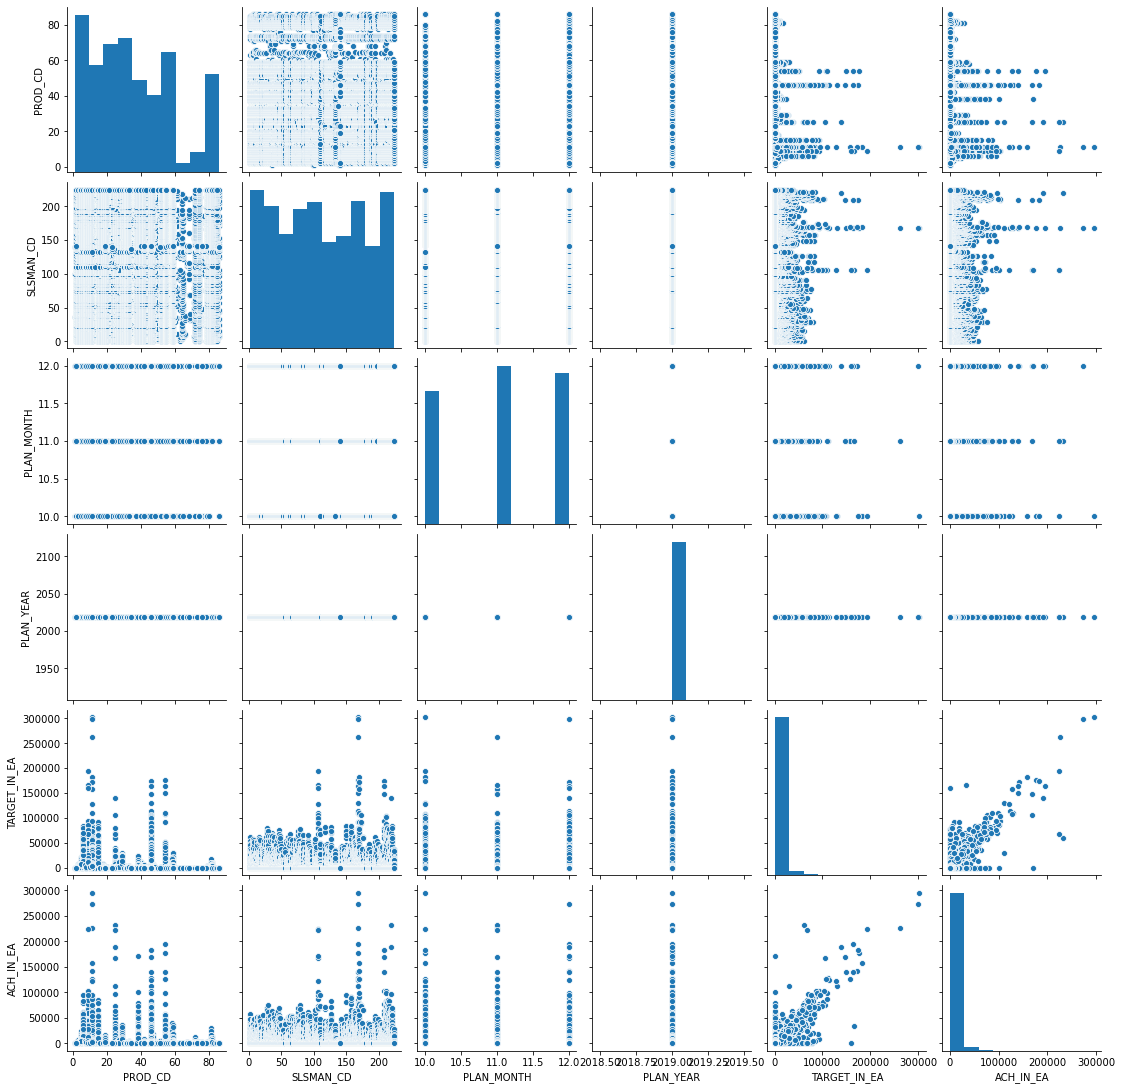

In [21]:
sns.pairplot(train1) ### We can see some colinearity in between 'target_in_ea' & 'ach_in_ea'

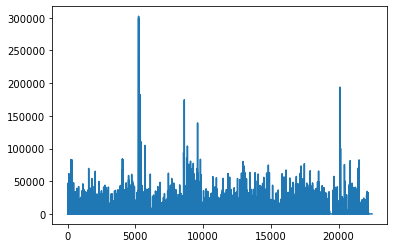

In [22]:
plt.plot(train1['TARGET_IN_EA'])

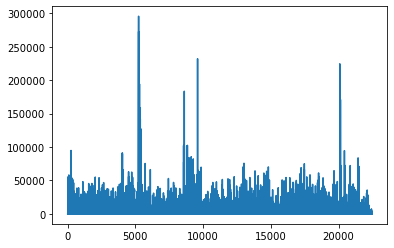

In [23]:
plt.plot(train1['ACH_IN_EA'])

<AxesSubplot:xlabel='PLAN_MONTH', ylabel='TARGET_IN_EA'>

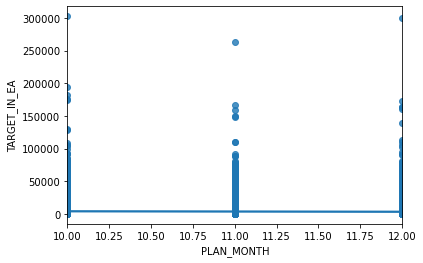

In [24]:
sns.regplot(x=train1['PLAN_MONTH'],y=train1['TARGET_IN_EA'])

<AxesSubplot:xlabel='PLAN_MONTH', ylabel='ACH_IN_EA'>

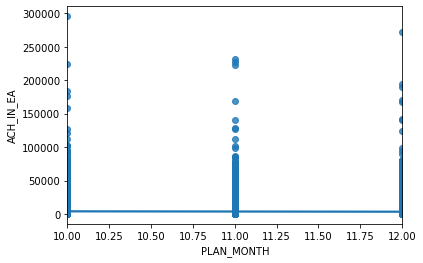

In [25]:
sns.regplot(x=train1['PLAN_MONTH'],y=train1['ACH_IN_EA'])

In [26]:
train1.groupby('PLAN_MONTH')['TARGET_IN_EA'].mean()

PLAN_MONTH
10    4491.333924
11    3284.776365
12    3698.947588
Name: TARGET_IN_EA, dtype: float64

<AxesSubplot:xlabel='PLAN_MONTH'>

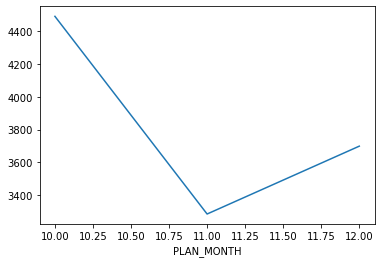

In [27]:
train1.groupby('PLAN_MONTH')['TARGET_IN_EA'].mean().plot()

In [28]:
train1.groupby('PLAN_MONTH')['ACH_IN_EA'].mean()

PLAN_MONTH
10    4172.458167
11    3465.212914
12    3569.689831
Name: ACH_IN_EA, dtype: float64

<AxesSubplot:xlabel='PLAN_MONTH'>

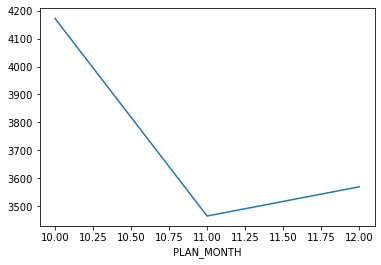

In [29]:
train1.groupby('PLAN_MONTH')['ACH_IN_EA'].mean().plot()

<AxesSubplot:xlabel='PROD_CD', ylabel='TARGET_IN_EA'>

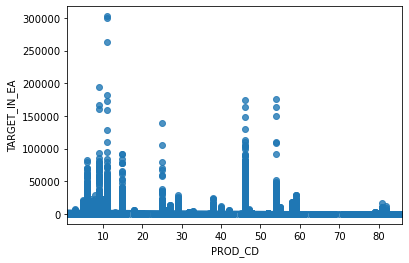

In [30]:
sns.regplot(x=train1['PROD_CD'],y=train1['TARGET_IN_EA'])

<AxesSubplot:xlabel='PROD_CD', ylabel='ACH_IN_EA'>

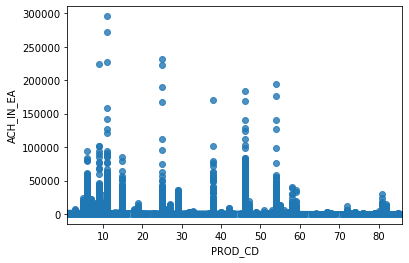

In [31]:
sns.regplot(x=train1['PROD_CD'],y=train1['ACH_IN_EA'])

<AxesSubplot:xlabel='PROD_CD'>

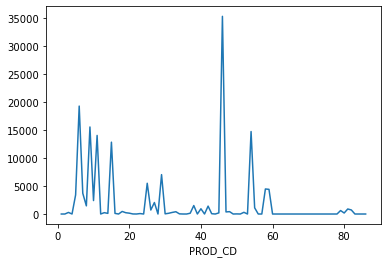

In [32]:
train1.groupby('PROD_CD')['TARGET_IN_EA'].mean().plot()

<AxesSubplot:xlabel='PROD_CD'>

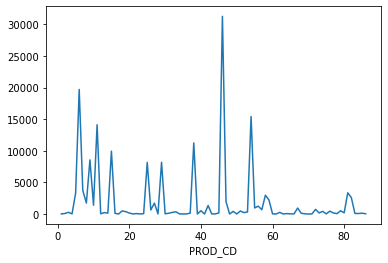

In [33]:
train1.groupby('PROD_CD')['ACH_IN_EA'].mean().plot()

<AxesSubplot:xlabel='SLSMAN_CD'>

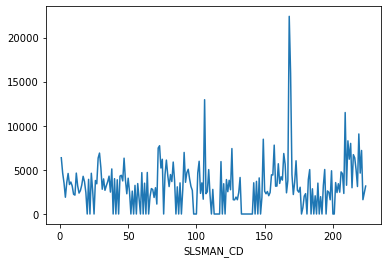

In [34]:
train1.groupby('SLSMAN_CD')['TARGET_IN_EA'].mean().plot()

<AxesSubplot:xlabel='SLSMAN_CD'>

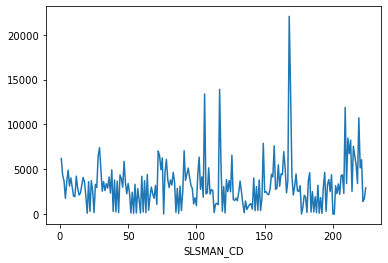

In [35]:
train1.groupby('SLSMAN_CD')['ACH_IN_EA'].mean().plot()

<AxesSubplot:title={'center':'Target distribution'}, ylabel='Density'>

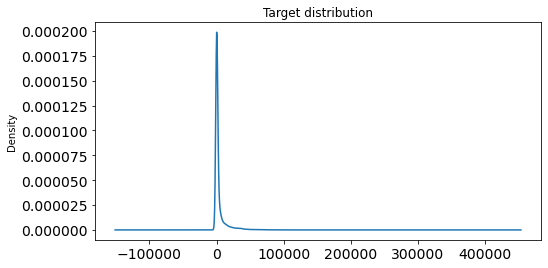

In [36]:
train1['TARGET_IN_EA'].plot(kind='density',title='Target distribution',fontsize=14,figsize=(8,4))

<AxesSubplot:title={'center':'Log Target Distribution'}, ylabel='Density'>

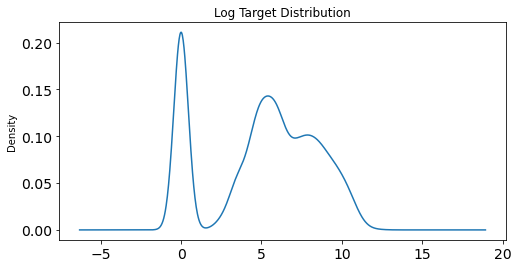

In [37]:
#### Seems like a normal distribution, we need a better visualization of this ####
pd.Series(np.log1p(train1['TARGET_IN_EA'])).plot(kind = 'density', title = 'Log Target Distribution', fontsize=14, figsize=(8,4))

<AxesSubplot:title={'center':'Target distribution'}, ylabel='Density'>

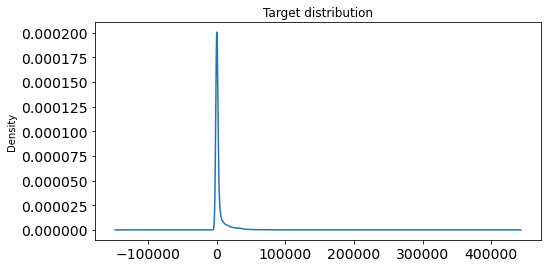

In [38]:
train1['ACH_IN_EA'].plot(kind='density',title='Target distribution',fontsize=14,figsize=(8,4))

<AxesSubplot:title={'center':'Log Target Distribution'}, ylabel='Density'>

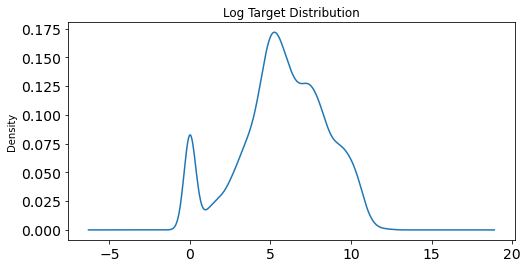

In [39]:
pd.Series(np.log1p(train1['ACH_IN_EA'])).plot(kind = 'density', title = 'Log Target Distribution', fontsize=14, figsize=(8,4))

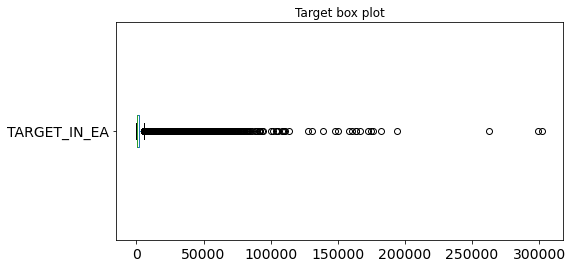

In [40]:
##### box plot ###### 

box_plot = train1['TARGET_IN_EA'].plot(kind = 'box',vert = False,fontsize = 14,title = 'Target box plot',figsize = (8,4))

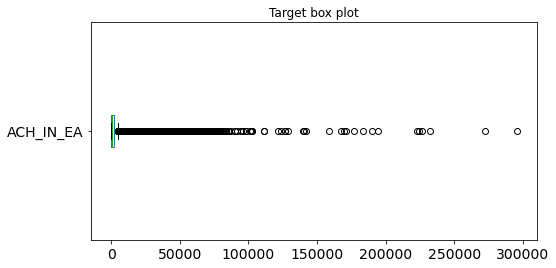

In [41]:
box_plot = train1['ACH_IN_EA'].plot(kind = 'box',vert = False,fontsize = 14,title = 'Target box plot',figsize = (8,4))

In [42]:
train1.nunique()

PROD_CD           86
SLSMAN_CD        224
PLAN_MONTH         3
PLAN_YEAR          1
TARGET_IN_EA    2020
ACH_IN_EA       6638
dtype: int64

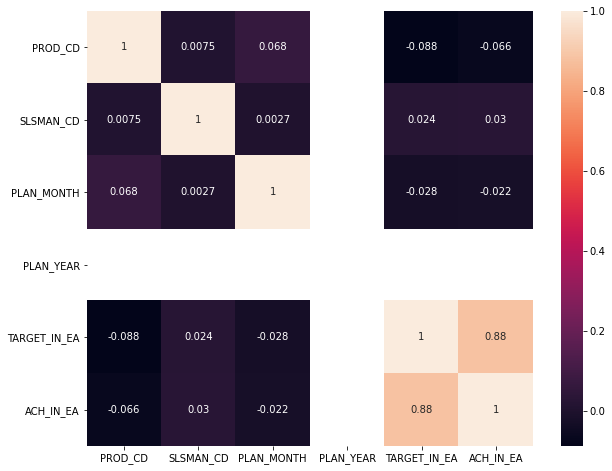

In [43]:
#### Correlation heatmap 

plt.figure(figsize=(10,8))
sns.heatmap(data=train1.corr(),annot=True)
plt.show()

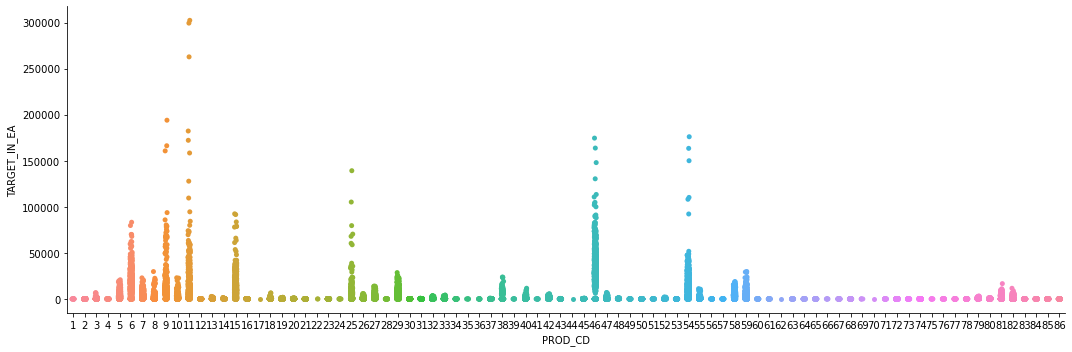

In [44]:
#### Cat plotting 
#### Target distribution per category 

sns.catplot(x='PROD_CD',y='TARGET_IN_EA',data=train1,height=5,aspect=18/6)

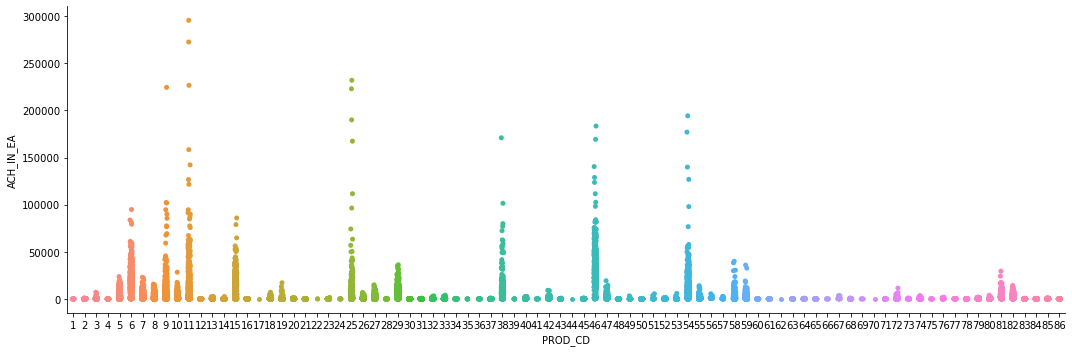

In [45]:
sns.catplot(x='PROD_CD',y='ACH_IN_EA',data=train1,height=5,aspect=18/6)

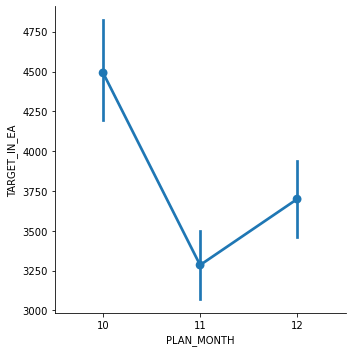

In [46]:
sns.factorplot(data = train1, x ="PLAN_MONTH", y = "TARGET_IN_EA")

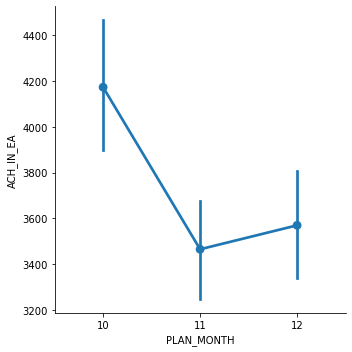

In [47]:
sns.factorplot(data = train1, x ="PLAN_MONTH", y = "ACH_IN_EA")

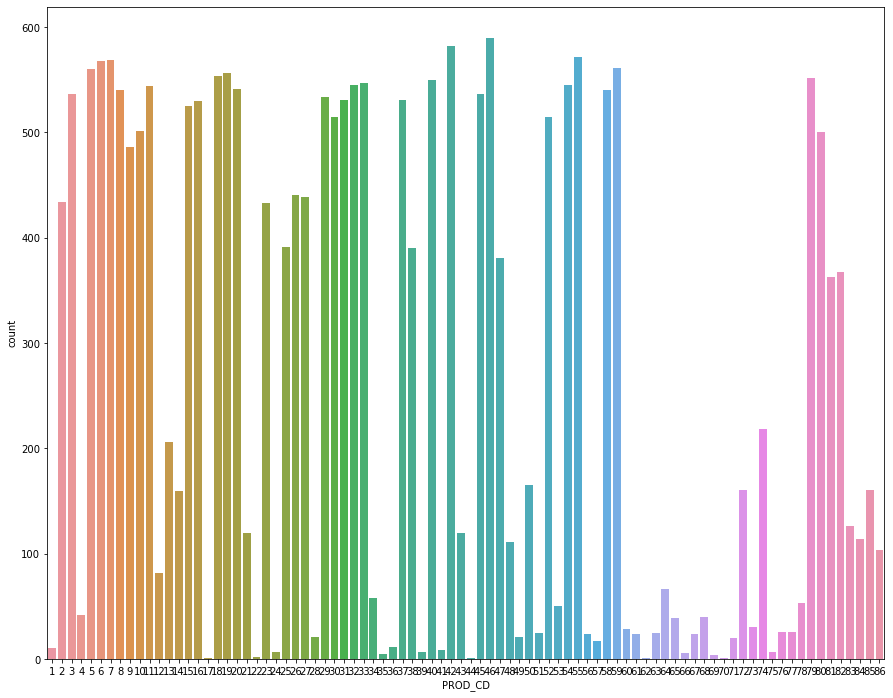

In [48]:
plt.figure(figsize=(15,12))
sns.countplot(x='PROD_CD',data= train1)
plt.show()

<AxesSubplot:>

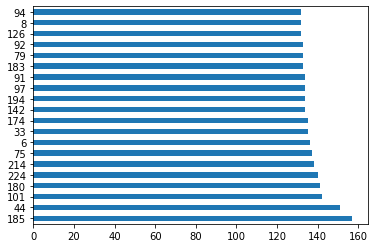

In [49]:
train1['SLSMAN_CD'].value_counts()[:20].plot(kind='barh') ### 'SLSMAN_CD'-138,186 & 103 having highest frequency.

In [50]:
test = pd.read_csv("future_sales_data_csv.csv")

In [51]:
test.head()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
0,PROD_3,SLSMAN_1,1,2020,40,0
1,PROD_5,SLSMAN_1,1,2020,240,0
2,PROD_11,SLSMAN_1,1,2020,360,0
3,PROD_13,SLSMAN_1,1,2020,"12,816",0
4,PROD_14,SLSMAN_1,1,2020,"44,460",0


In [52]:
#### Checking NULL values
test.isnull().sum()

PROD_CD         0
SLSMAN_CD       0
PLAN_MONTH      0
PLAN_YEAR       0
TARGET_IN_EA    0
ACH_IN_EA       0
dtype: int64

In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5839 entries, 0 to 5838
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PROD_CD       5839 non-null   object
 1   SLSMAN_CD     5839 non-null   object
 2   PLAN_MONTH    5839 non-null   int64 
 3   PLAN_YEAR     5839 non-null   int64 
 4   TARGET_IN_EA  5839 non-null   object
 5   ACH_IN_EA     5839 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 273.8+ KB


In [54]:
labels = test['PROD_CD'].astype('category').cat.categories.tolist()
replace_pd_1 = {'PROD_CD' :{k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_pd_1)

{'PROD_CD': {'PROD_11': 1, 'PROD_12': 2, 'PROD_13': 3, 'PROD_14': 4, 'PROD_15': 5, 'PROD_16': 6, 'PROD_17': 7, 'PROD_18': 8, 'PROD_19': 9, 'PROD_20': 10, 'PROD_21': 11, 'PROD_22': 12, 'PROD_23': 13, 'PROD_25': 14, 'PROD_26': 15, 'PROD_27': 16, 'PROD_28': 17, 'PROD_3': 18, 'PROD_30': 19, 'PROD_31': 20, 'PROD_32': 21, 'PROD_33': 22, 'PROD_35': 23, 'PROD_36': 24, 'PROD_37': 25, 'PROD_38': 26, 'PROD_39': 27, 'PROD_4': 28, 'PROD_42': 29, 'PROD_43': 30, 'PROD_45': 31, 'PROD_47': 32, 'PROD_48': 33, 'PROD_5': 34, 'PROD_50': 35, 'PROD_51': 36, 'PROD_52': 37, 'PROD_53': 38, 'PROD_54': 39, 'PROD_55': 40, 'PROD_56': 41, 'PROD_57': 42, 'PROD_58': 43, 'PROD_59': 44, 'PROD_6': 45, 'PROD_60': 46, 'PROD_61': 47, 'PROD_62': 48, 'PROD_7': 49, 'PROD_70': 50, 'PROD_75': 51, 'PROD_78': 52, 'PROD_79': 53, 'PROD_8': 54, 'PROD_80': 55, 'PROD_81': 56, 'PROD_82': 57, 'PROD_83': 58}}


In [55]:
labels = test['SLSMAN_CD'].astype('category').cat.categories.tolist()
replace_cd_1 = {'SLSMAN_CD' :{k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_cd_1)

{'SLSMAN_CD': {'SLSMAN_1': 1, 'SLSMAN_10': 2, 'SLSMAN_100': 3, 'SLSMAN_101': 4, 'SLSMAN_102': 5, 'SLSMAN_103': 6, 'SLSMAN_104': 7, 'SLSMAN_105': 8, 'SLSMAN_106': 9, 'SLSMAN_107': 10, 'SLSMAN_108': 11, 'SLSMAN_109': 12, 'SLSMAN_11': 13, 'SLSMAN_110': 14, 'SLSMAN_111': 15, 'SLSMAN_112': 16, 'SLSMAN_113': 17, 'SLSMAN_114': 18, 'SLSMAN_115': 19, 'SLSMAN_117': 20, 'SLSMAN_119': 21, 'SLSMAN_12': 22, 'SLSMAN_121': 23, 'SLSMAN_122': 24, 'SLSMAN_123': 25, 'SLSMAN_124': 26, 'SLSMAN_125': 27, 'SLSMAN_126': 28, 'SLSMAN_127': 29, 'SLSMAN_128': 30, 'SLSMAN_129': 31, 'SLSMAN_13': 32, 'SLSMAN_130': 33, 'SLSMAN_131': 34, 'SLSMAN_132': 35, 'SLSMAN_134': 36, 'SLSMAN_136': 37, 'SLSMAN_138': 38, 'SLSMAN_139': 39, 'SLSMAN_14': 40, 'SLSMAN_140': 41, 'SLSMAN_141': 42, 'SLSMAN_142': 43, 'SLSMAN_143': 44, 'SLSMAN_144': 45, 'SLSMAN_146': 46, 'SLSMAN_148': 47, 'SLSMAN_15': 48, 'SLSMAN_150': 49, 'SLSMAN_152': 50, 'SLSMAN_154': 51, 'SLSMAN_156': 52, 'SLSMAN_158': 53, 'SLSMAN_159': 54, 'SLSMAN_16': 55, 'SLSMAN_160':

In [56]:
test1 = test.copy()

In [57]:
### Use the replace() function on the DataFrame by passing the mapping dictionary as argument:

test1.replace(replace_pd_1,inplace=True)

print(test1.head())

   PROD_CD SLSMAN_CD  PLAN_MONTH  PLAN_YEAR TARGET_IN_EA  ACH_IN_EA
0       18  SLSMAN_1           1       2020           40          0
1       34  SLSMAN_1           1       2020          240          0
2        1  SLSMAN_1           1       2020          360          0
3        3  SLSMAN_1           1       2020       12,816          0
4        4  SLSMAN_1           1       2020       44,460          0


In [58]:
### As we can observe, we have encoded the categories with the mapped numbers in our DataFrame.

test1.replace(replace_cd_1,inplace=True)

print(test1.head())

   PROD_CD  SLSMAN_CD  PLAN_MONTH  PLAN_YEAR TARGET_IN_EA  ACH_IN_EA
0       18          1           1       2020           40          0
1       34          1           1       2020          240          0
2        1          1           1       2020          360          0
3        3          1           1       2020       12,816          0
4        4          1           1       2020       44,460          0


In [59]:
test1['TARGET_IN_EA']= test1['TARGET_IN_EA'].str.replace(',','').astype(int)

In [60]:
test1.head()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
0,18,1,1,2020,40,0
1,34,1,1,2020,240,0
2,1,1,1,2020,360,0
3,3,1,1,2020,12816,0
4,4,1,1,2020,44460,0


<AxesSubplot:xlabel='PROD_CD', ylabel='TARGET_IN_EA'>

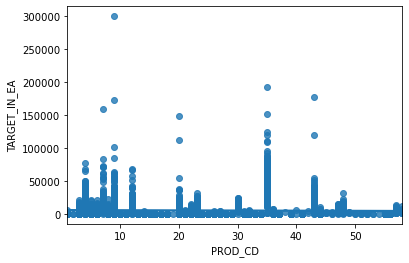

In [61]:
sns.regplot(x=test1['PROD_CD'],y=test1['TARGET_IN_EA'])

<AxesSubplot:xlabel='PROD_CD'>

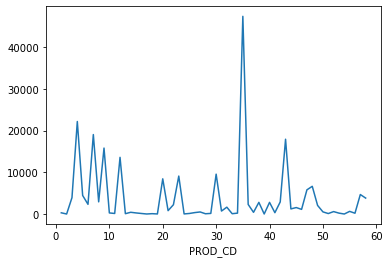

In [62]:
test1.groupby('PROD_CD')['TARGET_IN_EA'].mean().plot()

<AxesSubplot:xlabel='SLSMAN_CD'>

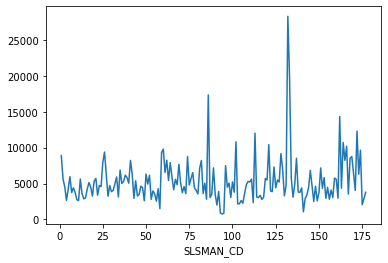

In [63]:
test1.groupby('SLSMAN_CD')['TARGET_IN_EA'].mean().plot()

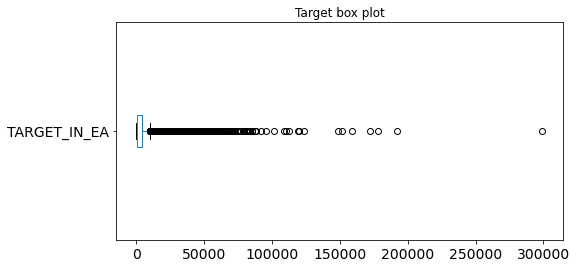

In [64]:
##### box plot ###### 

box_plot = test1['TARGET_IN_EA'].plot(kind = 'box',vert = False,fontsize = 14,title = 'Target box plot',figsize = (8,4))

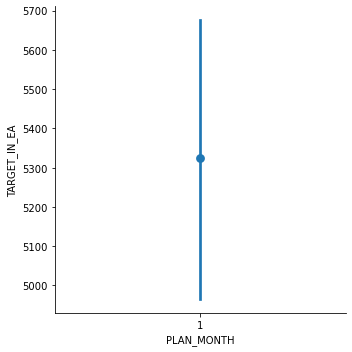

In [65]:
sns.factorplot(data = test1, x ="PLAN_MONTH", y = "TARGET_IN_EA")

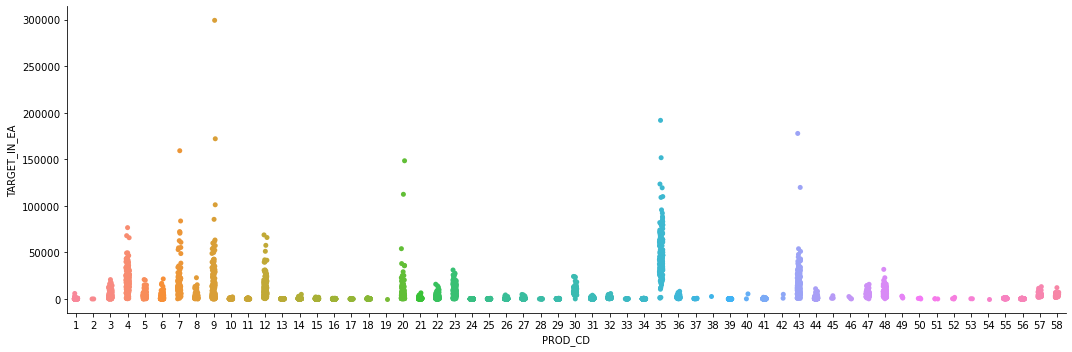

In [66]:
#### Cat plotting 
#### Target distribution per category 

sns.catplot(x='PROD_CD',y='TARGET_IN_EA',data=test1,height=5,aspect=18/6)

In [67]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from time import time
import os
from math import sqrt
import itertools
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
from pandas import DataFrame
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore') 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin    ##### Mixin class for all transformers in scikit-learn.#####\
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [68]:
######### dividing X and Y from the dataset ########### 

X= train1.drop(['ACH_IN_EA'],axis = 1)
Y =train1['ACH_IN_EA']
print(X.shape)
print(Y.shape)
xData = X.values
ydata = Y.values


(22469, 5)
(22469,)


In [69]:
test1.drop(['ACH_IN_EA'],axis=1,inplace=True)

In [70]:
####### using skitlearn to split data into training and testing ############## 

from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(xData,ydata,test_size = 0.2, random_state = 42)

In [71]:
print("Shape of xTrain: ", xTrain.shape)
print("Shape of xTest: ", xTest.shape)
print("Shape of yTrain: ", yTrain.shape)
print("Shape of yTest: ", yTest.shape)

Shape of xTrain:  (17975, 5)
Shape of xTest:  (4494, 5)
Shape of yTrain:  (17975,)
Shape of yTest:  (4494,)


# Model Building Using Multiple Linear Regression Method

In [72]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(xTrain,yTrain)
print(LR)

LinearRegression()


In [73]:
LR_score = LR.score(xTrain,yTrain)  
print("LinearModel Accuracy score: ", LR_score*100)
print("Intercept:",LR.intercept_)
print("Coefficient:",LR.coef_)

LinearModel Accuracy score:  78.23954723117146
Intercept: -446.7649483327232
Coefficient: [ 5.54528648  1.18297196 46.2922255   0.          0.8788959 ]


In [74]:
y_pred = LR.predict(xTest)

In [75]:
from sklearn import metrics
print('Linear Regression MAE:', metrics.mean_absolute_error(yTest,y_pred))
print('Linear Regression MSE:', metrics.mean_squared_error(yTest,y_pred))
print('Linear Regression RMSE:', np.sqrt(metrics.mean_squared_error(yTest,y_pred)))

Linear Regression MAE: 1638.860421280499
Linear Regression MSE: 21667103.885262206
Linear Regression RMSE: 4654.7936458303075


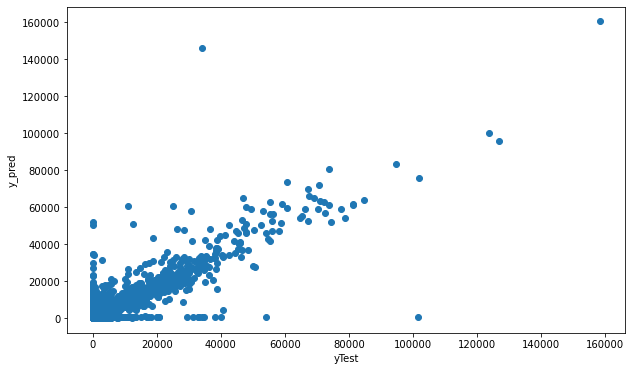

In [76]:
plt.figure(figsize=(10,6))
plt.scatter(yTest,y_pred)
plt.xlabel('yTest')
plt.ylabel('y_pred')
plt.show()

# Applying Ridge Regression

In [77]:
from sklearn.linear_model import Ridge

In [78]:
LR_r = Ridge(alpha=0.5)
LR_r.fit(xTrain,yTrain)
print(LR_r)

Ridge(alpha=0.5)


In [79]:
y_pred1 = LR_r.predict(xTest)

In [80]:
LR_r_score = LR_r.score(xTrain,yTrain)  
print("LinearModel Accuracy score: ", LR_r_score*100)
print("Intercept:",LR_r.intercept_)
print("Coefficient:",LR_r.coef_)

LinearModel Accuracy score:  78.23954723116923
Intercept: -446.74291141255344
Coefficient: [ 5.54529092  1.18297215 46.29021488  0.          0.87889589]


In [81]:
LR_r.score(xTest,yTest)

0.7857446955168125

In [82]:
from sklearn import metrics
print('Linear Regression MAE:', metrics.mean_absolute_error(yTest,y_pred1))
print('Linear Regression MSE:', metrics.mean_squared_error(yTest,y_pred1))
print('Linear Regression RMSE:', np.sqrt(metrics.mean_squared_error(yTest,y_pred1)))

Linear Regression MAE: 1638.8604083830955
Linear Regression MSE: 21667103.60945405
Linear Regression RMSE: 4654.793616204058


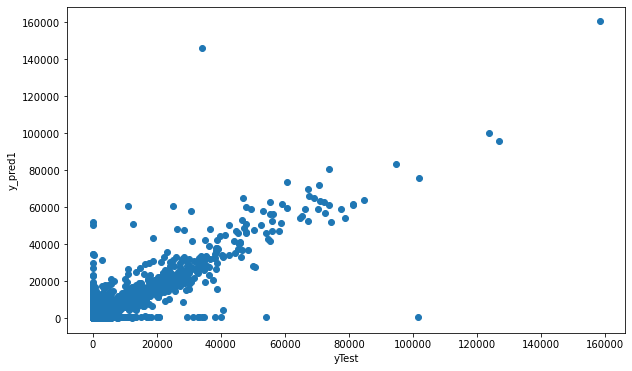

In [83]:
plt.figure(figsize=(10,6))
plt.scatter(yTest,y_pred1)
plt.xlabel('yTest')
plt.ylabel('y_pred1')
plt.show()

# Applying Random ForestRegressor

In [84]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)


In [85]:
rfr.fit(xTrain,yTrain)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=5000, n_jobs=1,
                      random_state=0)

In [86]:
import re
rfr_pred = rfr.predict(xTest)

In [87]:
rfr.score(xTrain,yTrain)   #### Training Accuracy is 93%

0.9371600414741835

In [88]:
import re
rfr_pred = rfr.predict(xTest)

In [89]:
rfr.score(xTest,yTest)

0.8927923282709818

In [90]:
from sklearn import metrics
metrics.r2_score(yTest,rfr_pred)

0.8927923282709818

In [91]:
print('Random Forest Regression MAE:', metrics.mean_absolute_error(yTest, rfr_pred))
print('Random Forest Regression MSE:', metrics.mean_squared_error(yTest, rfr_pred))
print('Random Forest Regression RMSE:', np.sqrt(metrics.mean_squared_error(yTest, rfr_pred)))

Random Forest Regression MAE: 1036.2792895742357
Random Forest Regression MSE: 10841643.975555573
Random Forest Regression RMSE: 3292.6651781733854


<AxesSubplot:>

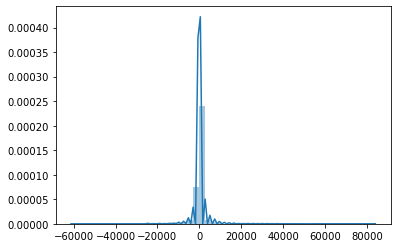

In [92]:
sns.distplot(yTest-rfr_pred)

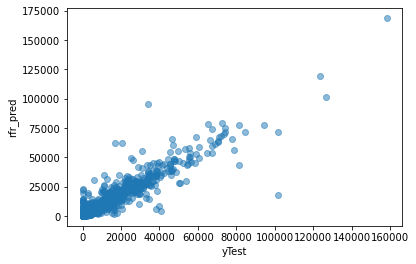

In [93]:
############# scatter plot ############ 

plt.scatter(yTest,rfr_pred,alpha=0.5)
plt.xlabel("yTest")
plt.ylabel("rfr_pred")
plt.show()

# HyperParameterTunning on RandomForestModel


In [94]:
############# Hyper parameter tunning ############## 

from sklearn.model_selection import RandomizedSearchCV

##### no. of trees in the random forest 
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

####### no. of features to consider in every split #########

max_features = ['auto','sqrt']

###### max no. of levels in tree########### 

max_depth = [int(x) for x in np.linspace(5,30, num = 6)]

##### min. no of samples required to split a node ######## 

min_samples_split = [2,5,10,15,100]

####### min no. of samples required at each leaf node ####### 

min_samples_leaf = [1,2,5,10]

In [95]:
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}

In [96]:
rf_random = RandomizedSearchCV(estimator = rfr,param_distributions= random_grid,scoring='neg_mean_squared_error',n_iter = 10, cv =5,verbose=2,random_state=42,n_jobs=1)
rf_random.fit(xTrain,yTrain)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  26.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.8s remaining:    0.0s


[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  17.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  17.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  16.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  17.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 17.2min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=30,
                                                   max_features='sqrt',
                                                   min_samples_leaf=2,
                                                   min_samples_split=5,
                                                   n_estimators=5000, n_jobs=1,
                                                   random_state=0),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700

In [97]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [98]:
rfr_pred1 = rf_random.predict(xTest)
rfr_pred1

array([ 367.01563333, 1623.105     , 2100.38221667, ...,  342.15649177,
        115.87046685,    4.50168217])

In [99]:
print('Hyper parameter RandomForest MAE:',metrics.mean_absolute_error(yTest,rfr_pred1))
print('Hyper parameter RandomForest MSE:',metrics.mean_squared_error(yTest,rfr_pred1))
print('Hyper parameter RandomForest RMsE:',np.sqrt(metrics.mean_squared_error(yTest,rfr_pred1)))

Hyper parameter RandomForest MAE: 1039.2798481707448
Hyper parameter RandomForest MSE: 11966944.014712926
Hyper parameter RandomForest RMsE: 3459.327104324326


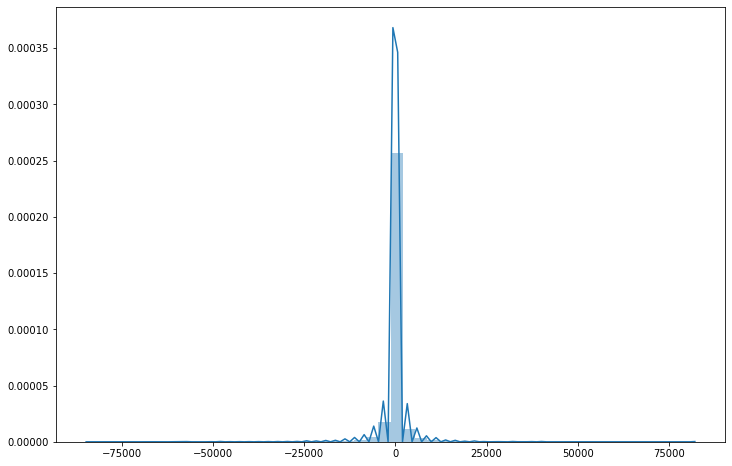

In [100]:
plt.figure(figsize=(12,8))
sns.distplot(yTest-rfr_pred1)
plt.show()

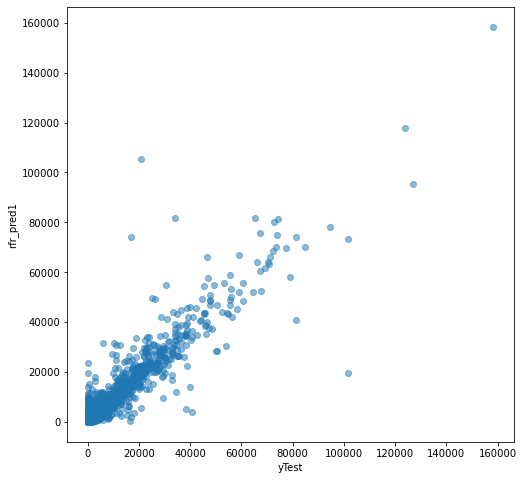

In [101]:
plt.figure(figsize=(8,8))
plt.scatter(yTest,rfr_pred1,alpha=0.5)
plt.xlabel("yTest")
plt.ylabel("rfr_pred1")
plt.show()

# XGBoost Regressor with hyperparameter tunning¶

In [102]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
xgb = XGBRegressor()
parameters = {'objective':['reg:linear'],'learning_rate':[0.03,0.05,0.07],'max_depth':[5,6,7],'min_child_weight':[4],'subsample':[0.7],
              'colsample_bytree':[0.7],'colsample_bylevel':[0.7],'alpha':[0.05],'lambda':[0.3],'n_estimators':[900]}
XGB = GridSearchCV(xgb,parameters,cv=5)
XGB.fit(xTrain,yTrain)

[21:45:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[21:45:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:17

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             pa

In [103]:
xgb_score = XGB.score(xTrain,yTrain)
print('Training score:',xgb_score*100)

Training score: 97.66110543054928


In [104]:
XGB.score(xTest,yTest)

0.8801288167892708

In [105]:
xgb_pred = XGB.predict(xTest)
xgb_pred

array([ 828.3668,  723.2465, 1193.7338, ...,  473.7401,  387.7507,
        326.5882], dtype=float32)

In [106]:
print('XGBoost MAE:', metrics.mean_absolute_error(yTest, xgb_pred))
print('XGBoost MSE:', metrics.mean_squared_error(yTest, xgb_pred))
print('XGBoost RMSE:', np.sqrt(metrics.mean_squared_error(yTest, xgb_pred)))

XGBoost MAE: 1215.5132034706721
XGBoost MSE: 12122273.250968793
XGBoost RMSE: 3481.705508937939


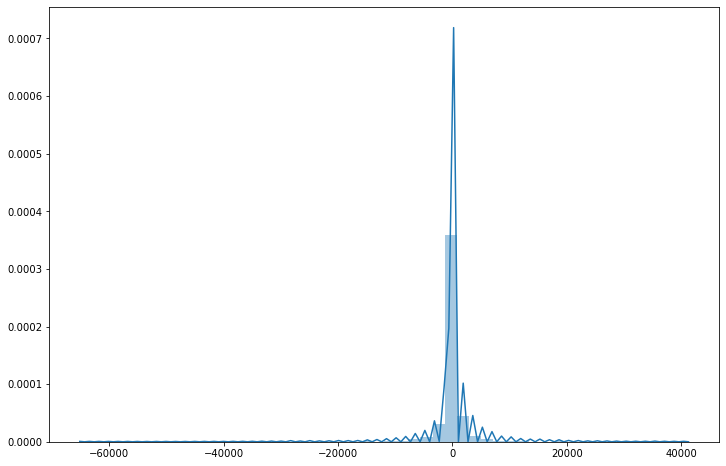

In [107]:
plt.figure(figsize=(12,8))
sns.distplot(yTest-xgb_pred)
plt.show()

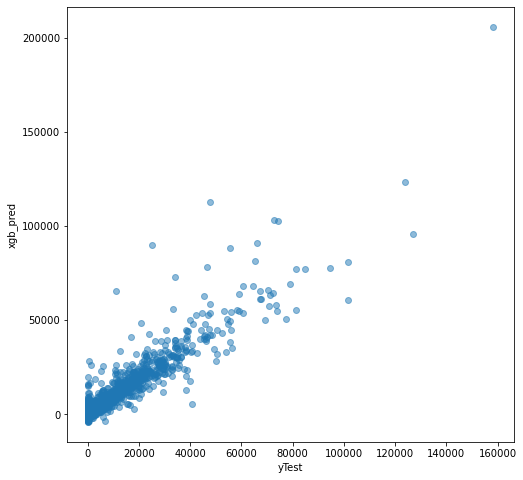

In [108]:
plt.figure(figsize=(8,8))
plt.scatter(yTest,xgb_pred,alpha=0.5)
plt.xlabel("yTest")
plt.ylabel("xgb_pred")
plt.show()

# Appying Gradient Boosting Regression

In [109]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, r2_score

In [110]:
params = {'n_estimators': 800, 'max_depth': 5, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls'}
GBR = ensemble.GradientBoostingRegressor(**params)

GBR.fit(xTrain, yTrain)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=800)

In [111]:
GBR_pred=GBR.predict(xTest)
GBR_pred 


array([ 280.42832112, -427.78584216, 1711.75457319, ...,   41.68648635,
         -3.50426375,   79.18020554])

In [112]:
GBR_score = GBR.score(xTrain,yTrain)  
print("GradientBoostingRegressor Accuracy score: ", GBR_score*100)

GradientBoostingRegressor Accuracy score:  96.80583927863825


In [113]:
GBR.score(xTest,yTest)

0.880911537179061

In [114]:
print('Gradient Boosting Regression MAE:', metrics.mean_absolute_error(yTest, GBR_pred))
print('Gradient Boosting Regression MSE:', metrics.mean_squared_error(yTest, GBR_pred))
print('Gradient Boosting Regression RMSE:', np.sqrt(metrics.mean_squared_error(yTest, GBR_pred)))

Gradient Boosting Regression MAE: 1053.9188604588219
Gradient Boosting Regression MSE: 12043118.693634847
Gradient Boosting Regression RMSE: 3470.3196817634607


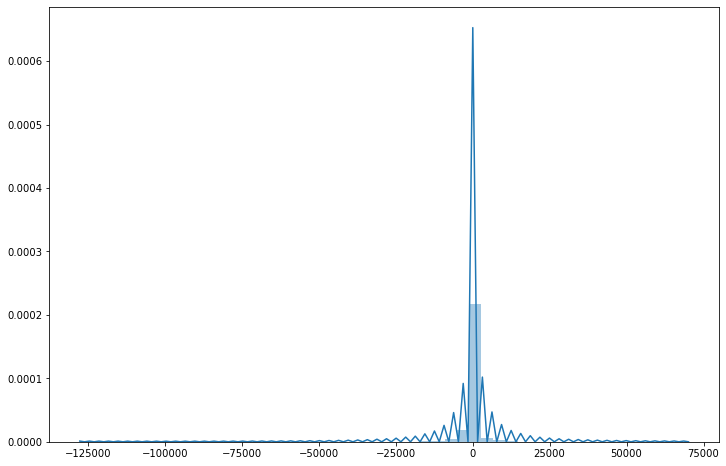

In [115]:
plt.figure(figsize=(12,8))
sns.distplot(yTest-GBR_pred)
plt.show() 

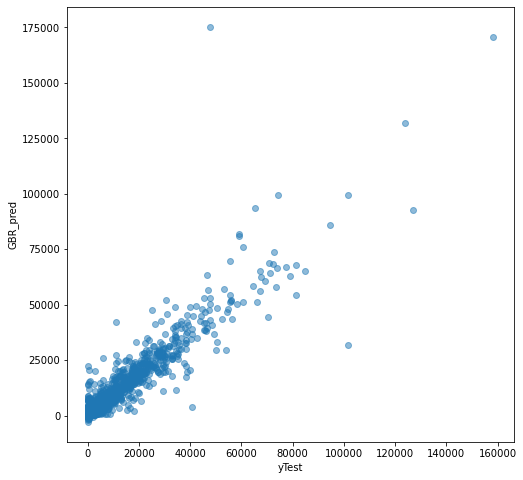

In [116]:
plt.figure(figsize=(8,8))
plt.scatter(yTest,GBR_pred,alpha=0.5)
plt.xlabel("yTest")
plt.ylabel("GBR_pred")
plt.show()

# Applying support vector Regressor

In [117]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf',C=1e3, gamma = 0.5, epsilon = 0.01)
svr.fit(xTrain,yTrain)

SVR(C=1000.0, epsilon=0.01, gamma=0.5)

In [118]:
svr_pred = svr.predict(xTest)
svr_pred

array([470.20551857, 873.60729255, 873.60729255, ..., 763.81157233,
       714.81598078, -50.10371655])

In [119]:
svr.score(xTrain,yTrain)

-0.0073367469986440614

In [120]:
svr.score(xTest,yTest)

-0.07459417037371097

In [121]:
print('SVM MAE:', metrics.mean_absolute_error(yTest, svr_pred))
print('SVM MSE:', metrics.mean_squared_error(yTest, svr_pred))
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(yTest, svr_pred)))

SVM MAE: 3553.378053057391
SVM MSE: 108671023.49584788
SVM RMSE: 10424.539486032363


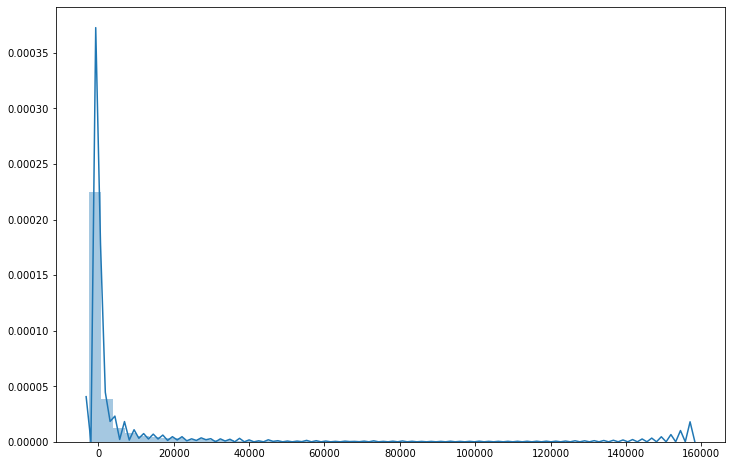

In [122]:
plt.figure(figsize=(12,8))
sns.distplot(yTest-svr_pred)
plt.show() 

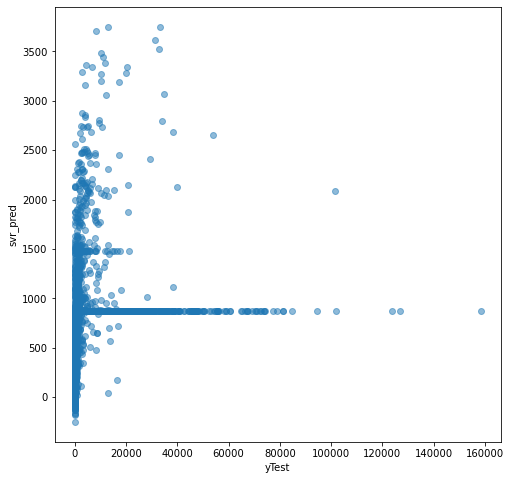

In [123]:
plt.figure(figsize=(8,8))
plt.scatter(yTest,svr_pred,alpha=0.5)
plt.xlabel("yTest")
plt.ylabel("svr_pred")
plt.show()

# DecisionTree Regressor

In [124]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100,criterion='mse',splitter='best',min_samples_split=100,
                              min_samples_leaf=10,
                              min_impurity_decrease=0.0,min_impurity_split=0.0)
dtreg.fit(xTrain, yTrain)

DecisionTreeRegressor(min_impurity_split=0.0, min_samples_leaf=10,
                      min_samples_split=100, random_state=100)

In [125]:
dtr_pred = dtreg.predict(xTest)
dtr_pred

array([4.17800000e+02, 5.66218947e+03, 2.23293976e+03, ...,
       5.35555556e+00, 1.19739130e+02, 1.89247312e+00])

In [126]:
dtreg.score(xTest,yTest)

0.8083570565021203

In [127]:
dtreg.score(xTrain,yTrain)

0.7993250634589816

In [128]:
print('Decision Tree Regression MAE:', metrics.mean_absolute_error(yTest, dtr_pred))
print('Decision Tree Regression MSE:', metrics.mean_squared_error(yTest, dtr_pred))
print('Decision Tree Regression RMSE:', np.sqrt(metrics.mean_squared_error(yTest, dtr_pred)))

Decision Tree Regression MAE: 1372.6724520648988
Decision Tree Regression MSE: 19380372.041687958
Decision Tree Regression RMSE: 4402.314396052145


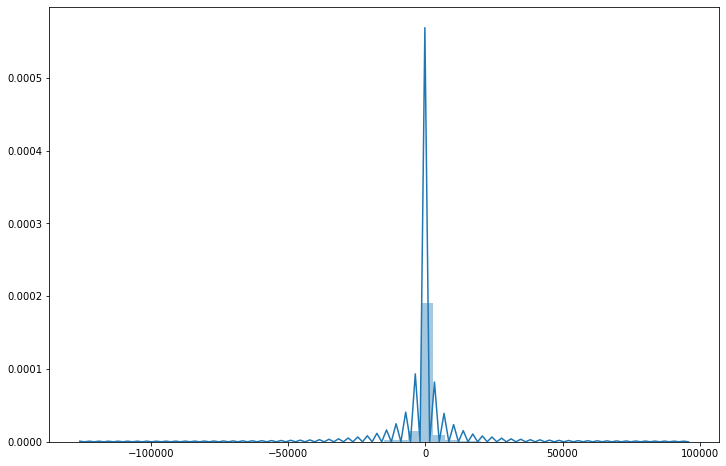

In [129]:
plt.figure(figsize=(12,8))
sns.distplot(yTest-dtr_pred)
plt.show() 

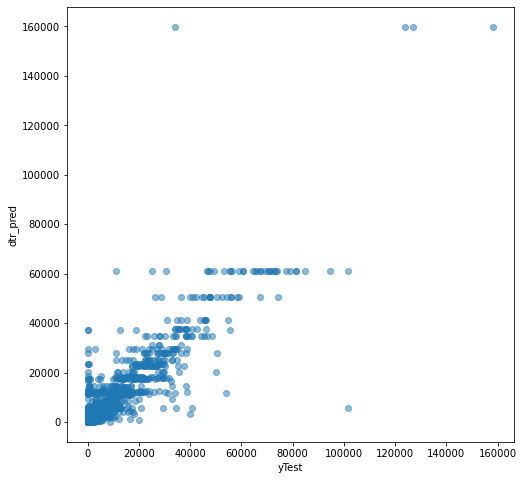

In [130]:
plt.figure(figsize=(8,8))
plt.scatter(yTest,dtr_pred,alpha=0.5)
plt.xlabel("yTest")
plt.ylabel("dtr_pred")
plt.show()

# Applying ADABoostRegression

In [131]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(base_estimator=None, n_estimators=5000, learning_rate=1.0, loss='linear', random_state=100)
ada.fit(xTrain,yTrain)

AdaBoostRegressor(n_estimators=5000, random_state=100)

In [132]:
ada_pred = ada.predict(xTest)
ada_pred

array([3090.07770725, 8942.79861797, 2316.31169978, ..., 2316.31169978,
       3090.07770725, 2316.31169978])

In [133]:
ada.score(xTrain,yTrain)

0.7605222186052129

In [134]:
ada.score(xTest,yTest)

0.7305507082825989

In [135]:
print('ADA Boosting Regression MAE:', metrics.mean_absolute_error(yTest, ada_pred))
print('ADA Boosting Regression MSE:', metrics.mean_squared_error(yTest, ada_pred))
print('ADA Boosting Regression RMSE:', np.sqrt(metrics.mean_squared_error(yTest, ada_pred)))

ADA Boosting Regression MAE: 3572.7605496078436
ADA Boosting Regression MSE: 27248733.632137716
ADA Boosting Regression RMSE: 5220.031957003493


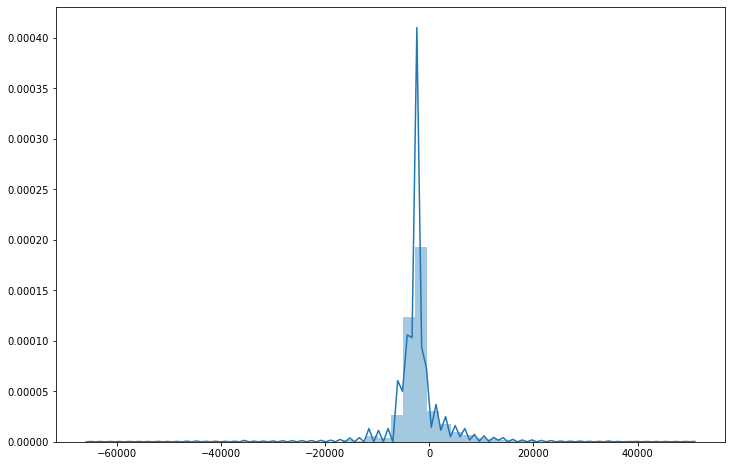

In [136]:
plt.figure(figsize=(12,8))
sns.distplot(yTest-ada_pred)
plt.show() 

# Applying CatBoostRegressor

In [137]:
from catboost import CatBoostRegressor

catb=CatBoostRegressor(iterations=400, depth=5, learning_rate=0.1, loss_function='RMSE')
catb.fit(xTrain,yTrain)

0:	learn: 10043.6712263	total: 234ms	remaining: 1m 33s
1:	learn: 9418.7798814	total: 249ms	remaining: 49.5s
2:	learn: 8886.8372496	total: 281ms	remaining: 37.2s
3:	learn: 8399.8214785	total: 301ms	remaining: 29.8s
4:	learn: 7989.1753303	total: 338ms	remaining: 26.7s
5:	learn: 7620.8419535	total: 356ms	remaining: 23.4s
6:	learn: 7304.4287960	total: 373ms	remaining: 20.9s
7:	learn: 7033.7569011	total: 393ms	remaining: 19.2s
8:	learn: 6811.4495110	total: 430ms	remaining: 18.7s
9:	learn: 6605.7015451	total: 448ms	remaining: 17.5s
10:	learn: 6427.5722005	total: 465ms	remaining: 16.4s
11:	learn: 6259.0568599	total: 494ms	remaining: 16s
12:	learn: 6127.4796674	total: 511ms	remaining: 15.2s
13:	learn: 6017.3726358	total: 524ms	remaining: 14.5s
14:	learn: 5921.3647623	total: 546ms	remaining: 14s
15:	learn: 5833.8424767	total: 554ms	remaining: 13.3s
16:	learn: 5755.3912116	total: 562ms	remaining: 12.7s
17:	learn: 5700.8388318	total: 574ms	remaining: 12.2s
18:	learn: 5632.5885878	total: 582ms	rem

In [138]:
catb_pred = catb.predict(xTest)
catb_pred

array([ 106.26999817,  773.89662779, 1669.86401677, ...,   95.72652718,
       -148.50687919,  164.9872035 ])

In [139]:
catb.score(xTrain,yTrain)

0.9341935848019551

In [140]:
catb.score(xTest,yTest)

0.9032046594809673

In [141]:
print('CAT Boosting Regression MAE:', metrics.mean_absolute_error(yTest, catb_pred))
print('CAT Boosting Regression MSE:', metrics.mean_squared_error(yTest, catb_pred))
print('CAT Boosting Regression RMSE:', np.sqrt(metrics.mean_squared_error(yTest, catb_pred)))

CAT Boosting Regression MAE: 1120.0128834541517
CAT Boosting Regression MSE: 9788670.936279384
CAT Boosting Regression RMSE: 3128.6851769200725


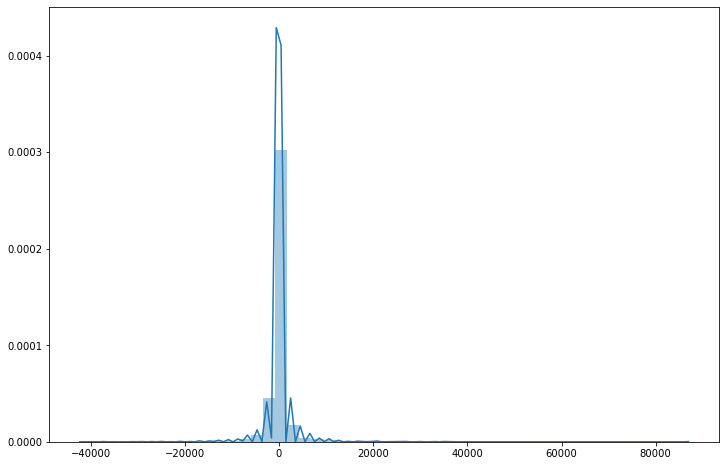

In [142]:
plt.figure(figsize=(12,8))
sns.distplot(yTest-catb_pred)
plt.show() 

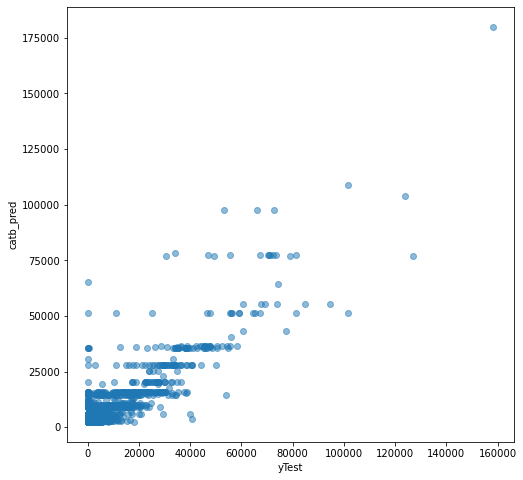

In [143]:
plt.figure(figsize=(8,8))
plt.scatter(yTest,ada_pred,alpha=0.5)
plt.xlabel("yTest")
plt.ylabel("catb_pred")
plt.show()

# Applying LightGBM Regressor¶

In [144]:
import lightgbm as lgb
from lightgbm.sklearn import LGBMRegressor

In [145]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.1,n_estimators=5000,
                              max_bin=55,bagging_fraction=0.8,
                              bagging_freq=5,feature_fraction=0.2319,
                              feature_fraction_seed=9,bagging_seed=9,
                              min_data_in_leaf=6,min_sum_hessian_in_leaf=11)

In [146]:
model_lgb.fit(xTrain,yTrain)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              feature_fraction=0.2319, feature_fraction_seed=9, max_bin=55,
              min_data_in_leaf=6, min_sum_hessian_in_leaf=11, n_estimators=5000,
              num_leaves=5, objective='regression')

In [147]:
lgb_pred = model_lgb.predict(xTest)
lgb_pred

array([ 1284.5433779 ,  7642.39161909,   280.29933585, ...,
        -220.16868555,  2195.70429012, -1204.16898649])

In [148]:
model_lgb.score(xTest,yTest)

0.4855142112024542

In [149]:
model_lgb.score(xTrain,yTrain)

0.38668429407437177

In [150]:
print('LightGBM MAE:', metrics.mean_absolute_error(yTest, lgb_pred))
print('LightGBM MSE:', metrics.mean_squared_error(yTest, lgb_pred))
print('LightGBM RMSE:', np.sqrt(metrics.mean_squared_error(yTest, lgb_pred)))

LightGBM MAE: 3233.7139348712044
LightGBM MSE: 52028662.339806154
LightGBM RMSE: 7213.089652832977


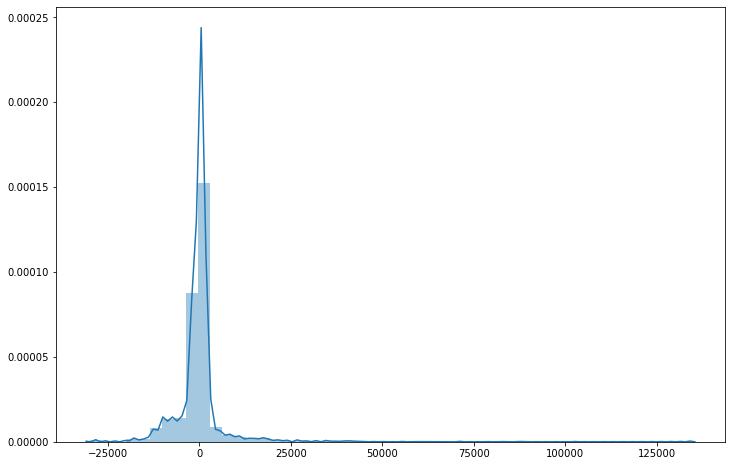

In [151]:
plt.figure(figsize=(12,8))
sns.distplot(yTest-lgb_pred)
plt.show()                      #### We can clearly see a right sckewed diagram 

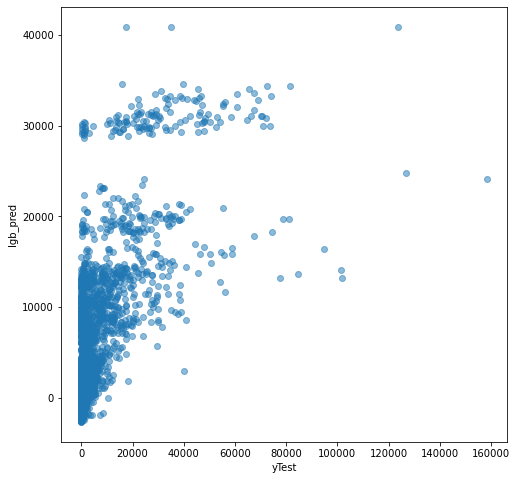

In [152]:
plt.figure(figsize=(8,8))
plt.scatter(yTest,lgb_pred,alpha=0.5)
plt.xlabel("yTest")
plt.ylabel("lgb_pred")
plt.show()    

# K-fold cross validation with different model

In [153]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold


In [154]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(GBR,X,Y,cv=10)
score

array([0.87280873, 0.840762  , 0.81937453, 0.87215308, 0.81031697,
       0.90767678, 0.9444223 , 0.91118922, 0.71544631, 0.85167795])

In [155]:
score.mean()

0.8545827870725093

# Model Comparison

In [156]:
comparision = {'Model':['Linear Regression','Gradient Boosting Regression','Decision Tree Regression','support vector machine',
                       'Random Forest Regression','Hyperparamer RandomForest','LightGBM','XGBoost','ADABoost','CATBoost'],
              'Mean_Absolute_Error':[metrics.mean_absolute_error(yTest,y_pred),metrics.mean_absolute_error(yTest, GBR_pred),metrics.mean_absolute_error(yTest, dtr_pred),
                                     metrics.mean_absolute_error(yTest, svr_pred),metrics.mean_absolute_error(yTest, rfr_pred),metrics.mean_absolute_error(yTest, rfr_pred1),metrics.mean_absolute_error(yTest, lgb_pred),metrics.mean_absolute_error(yTest, xgb_pred),metrics.mean_absolute_error(yTest, ada_pred),metrics.mean_absolute_error(yTest, catb_pred)],
              'mean_squared_error':[metrics.mean_squared_error(yTest,y_pred),metrics.mean_squared_error(yTest, GBR_pred),metrics.mean_squared_error(yTest, dtr_pred),
                                    metrics.mean_squared_error(yTest, svr_pred),metrics.mean_squared_error(yTest, rfr_pred),metrics.mean_squared_error(yTest, rfr_pred1),metrics.mean_squared_error(yTest, lgb_pred),metrics.mean_squared_error(yTest, xgb_pred),metrics.mean_squared_error(yTest, ada_pred),metrics.mean_squared_error(yTest, catb_pred)],
               'RMSE':[np.sqrt(metrics.mean_squared_error(yTest,y_pred)),np.sqrt(metrics.mean_squared_error(yTest, GBR_pred)),np.sqrt(metrics.mean_squared_error(yTest, dtr_pred)),
                       np.sqrt(metrics.mean_squared_error(yTest, svr_pred)),np.sqrt(metrics.mean_squared_error(yTest, rfr_pred)),np.sqrt(metrics.mean_squared_error(yTest, rfr_pred1)),np.sqrt(metrics.mean_squared_error(yTest, lgb_pred)),np.sqrt(metrics.mean_squared_error(yTest, xgb_pred)),np.sqrt(metrics.mean_squared_error(yTest, ada_pred)),np.sqrt(metrics.mean_squared_error(yTest, catb_pred))]}
comparision= pd.DataFrame.from_dict(comparision)
comparision

,Model,Mean_Absolute_Error,mean_squared_error,RMSE
0,Linear Regression,1638.860421,2.166710e+07,4654.793646
1,Gradient Boosting Regression,1053.918860,1.204312e+07,3470.319682
2,Decision Tree Regression,1372.672452,1.938037e+07,4402.314396
3,support vector machine,3553.378053,1.086710e+08,10424.539486
4,Random Forest Regression,1036.279290,1.084164e+07,3292.665178
5,Hyperparamer RandomForest,1039.279848,1.196694e+07,3459.327104
6,LightGBM,3233.713935,5.202866e+07,7213.089653
7,XGBoost,1215.513203,1.212227e+07,3481.705509
8,ADABoost,3572.760550,2.724873e+07,5220.031957
9,CATBoost,1120.012883,9.788671e+06,3128.685177


In [157]:
error_rate=np.array([metrics.mean_squared_error(yTest,y_pred),
                     metrics.mean_squared_error(yTest, GBR_pred),
                     metrics.mean_squared_error(yTest, dtr_pred),
                     metrics.mean_squared_error(yTest, svr_pred),
                     metrics.mean_squared_error(yTest, rfr_pred),
                     metrics.mean_squared_error(yTest, rfr_pred1),
                     metrics.mean_squared_error(yTest, lgb_pred),
                     metrics.mean_squared_error(yTest, xgb_pred),
                     metrics.mean_squared_error(yTest, ada_pred),
                     metrics.mean_squared_error(yTest, catb_pred)])
error_rate

array([2.16671039e+07, 1.20431187e+07, 1.93803720e+07, 1.08671023e+08,
       1.08416440e+07, 1.19669440e+07, 5.20286623e+07, 1.21222733e+07,
       2.72487336e+07, 9.78867094e+06])

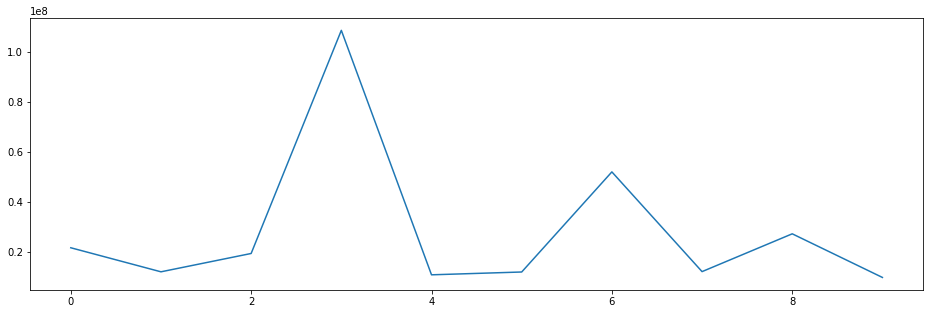

In [158]:
plt.figure(figsize=(16,5))
plt.plot(error_rate)

# Predicting January Achivement using Gradient Boosting

In [159]:
test_prediction_GBR=GBR.predict(test1)

In [160]:
test_prediction_GBR

array([ 319.05241639,  273.38211932,   -7.42829772, ..., 3746.26078615,
       1113.27238794,  514.89508352])

In [161]:
test_prediction_GBR = pd.DataFrame(test_prediction_GBR, columns=['GBR_ACH_IN_EA'])

In [162]:
result = pd.concat([test1,test_prediction_GBR], axis=1)
result.head()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,GBR_ACH_IN_EA
0,18,1,1,2020,40,319.052416
1,34,1,1,2020,240,273.382119
2,1,1,1,2020,360,-7.428298
3,3,1,1,2020,12816,14545.368477
4,4,1,1,2020,44460,46820.765060


# Predicting January Achivement using RandomForest

In [163]:
test_prediction_RFR=rfr.predict(test1)

In [164]:
test_prediction_RFR

array([ 164.2371013 ,  224.0171101 ,  774.48346305, ..., 3413.44528166,
        803.38637527,  312.0977116 ])

In [165]:
test_prediction_RFR = pd.DataFrame(test_prediction_RFR, columns=['RFR_ACH_IN_EA'])

In [166]:
result = pd.concat([result,test_prediction_RFR], axis=1)
result.head()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,GBR_ACH_IN_EA,RFR_ACH_IN_EA
0,18,1,1,2020,40,319.052416,164.237101
1,34,1,1,2020,240,273.382119,224.017110
2,1,1,1,2020,360,-7.428298,774.483463
3,3,1,1,2020,12816,14545.368477,11018.170583
4,4,1,1,2020,44460,46820.765060,39564.624247


# Predicting January Achivement using Hyperparameter RandomForest

In [167]:
test_prediction_RFR_tunning=rf_random.predict(test1)

In [168]:
test_prediction_RFR_tunning

array([ 132.86800606,  234.53496651,  391.668     , ..., 3437.68      ,
        788.70461843,  293.4385881 ])

In [169]:
test_prediction_RFR_tunning = pd.DataFrame(test_prediction_RFR_tunning, columns=['RFR_tunning_ACH_IN_EA'])

In [170]:
result = pd.concat([result,test_prediction_RFR_tunning], axis=1)
result.head() 

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,GBR_ACH_IN_EA,RFR_ACH_IN_EA,RFR_tunning_ACH_IN_EA
0,18,1,1,2020,40,319.052416,164.237101,132.868006
1,34,1,1,2020,240,273.382119,224.017110,234.534967
2,1,1,1,2020,360,-7.428298,774.483463,391.668000
3,3,1,1,2020,12816,14545.368477,11018.170583,11119.892000
4,4,1,1,2020,44460,46820.765060,39564.624247,41235.318000


# Predicting January Achivement using CATBoost

In [171]:
test_prediction_Ca=catb.predict(test1)

In [172]:
test_prediction_Ca

array([ 568.81744273,  186.73959211,   68.25010057, ..., 3685.66827928,
       1037.77180756,  264.06812219])

In [173]:
test_prediction_Ca = pd.DataFrame(test_prediction_Ca, columns=['Ca_ACH_IN_EA'])

In [174]:
result1 = pd.concat([test1,test_prediction_RFR], axis=1)
result1.head()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,RFR_ACH_IN_EA
0,18,1,1,2020,40,164.237101
1,34,1,1,2020,240,224.017110
2,1,1,1,2020,360,774.483463
3,3,1,1,2020,12816,11018.170583
4,4,1,1,2020,44460,39564.624247


In [175]:
result1.head(10)

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,RFR_ACH_IN_EA
0,18,1,1,2020,40,164.237101
1,34,1,1,2020,240,224.017110
2,1,1,1,2020,360,774.483463
3,3,1,1,2020,12816,11018.170583
4,4,1,1,2020,44460,39564.624247
5,5,1,1,2020,15012,15289.689979
6,6,1,1,2020,2268,4380.321436
7,7,1,1,2020,22320,24245.773460
8,8,1,1,2020,9300,9252.837650
9,9,1,1,2020,19320,18186.110781


# EDA,PreProcessing of new January data

In [176]:
new1 = result1[['PROD_CD','SLSMAN_CD','PLAN_MONTH','PLAN_YEAR','TARGET_IN_EA','RFR_ACH_IN_EA']]

In [177]:
new1.head()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,RFR_ACH_IN_EA
0,18,1,1,2020,40,164.237101
1,34,1,1,2020,240,224.017110
2,1,1,1,2020,360,774.483463
3,3,1,1,2020,12816,11018.170583
4,4,1,1,2020,44460,39564.624247


In [178]:
new1.shape

(5839, 6)

In [179]:
new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5839 entries, 0 to 5838
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PROD_CD        5839 non-null   int64  
 1   SLSMAN_CD      5839 non-null   int64  
 2   PLAN_MONTH     5839 non-null   int64  
 3   PLAN_YEAR      5839 non-null   int64  
 4   TARGET_IN_EA   5839 non-null   int32  
 5   RFR_ACH_IN_EA  5839 non-null   float64
dtypes: float64(1), int32(1), int64(4)
memory usage: 251.0 KB


In [180]:
new1.describe()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,RFR_ACH_IN_EA
count,5839.000000,5839.000000,5839.0,5839.0,5839.000000,5839.000000
mean,24.804590,88.010447,1.0,2020.0,5323.620997,4583.433148
std,15.630716,51.760127,0.0,0.0,13229.767694,10285.805391
min,1.000000,1.000000,1.0,2020.0,6.000000,5.643047
25%,12.000000,43.000000,1.0,2020.0,144.000000,224.737019
50%,24.000000,86.000000,1.0,2020.0,600.000000,667.556954
75%,35.000000,133.000000,1.0,2020.0,4062.000000,3530.935560
max,58.000000,177.000000,1.0,2020.0,299208.000000,157460.623841


In [181]:
new1.isnull().sum()

PROD_CD          0
SLSMAN_CD        0
PLAN_MONTH       0
PLAN_YEAR        0
TARGET_IN_EA     0
RFR_ACH_IN_EA    0
dtype: int64

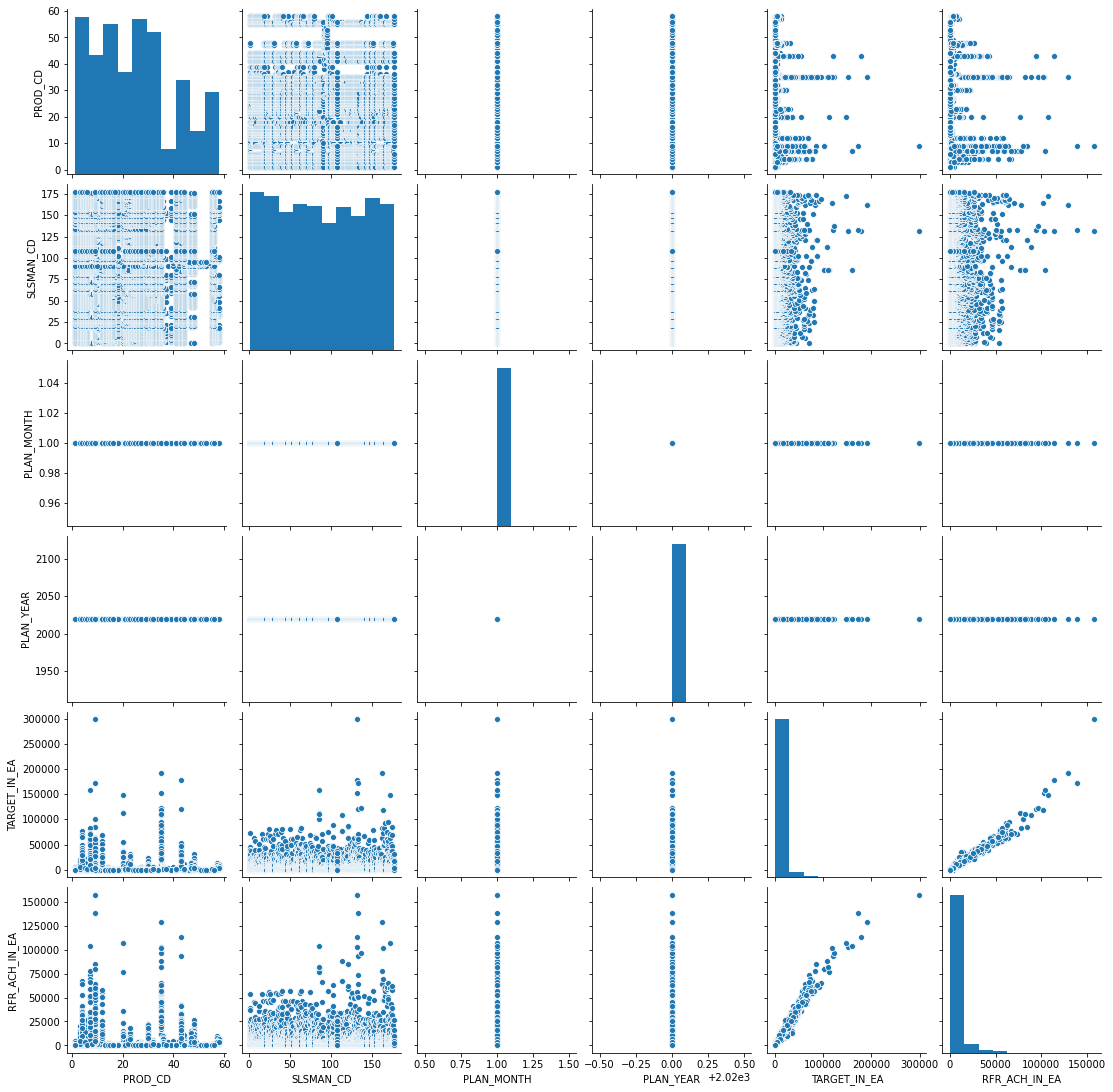

In [182]:
sns.pairplot(new1)

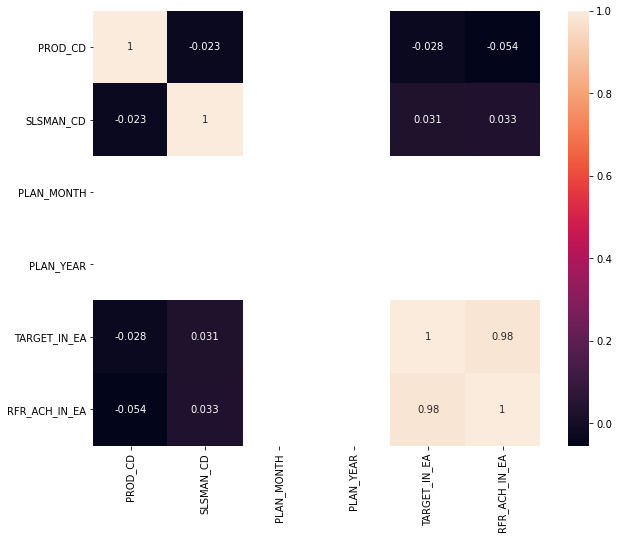

In [183]:
plt.figure(figsize=(10,8))
sns.heatmap(data=new1.corr(),annot=True)
plt.show()

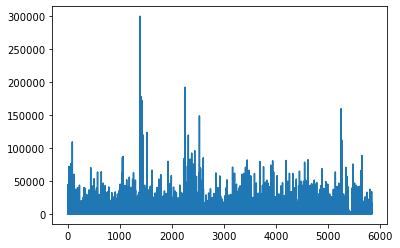

In [184]:
plt.plot(new1['TARGET_IN_EA'])

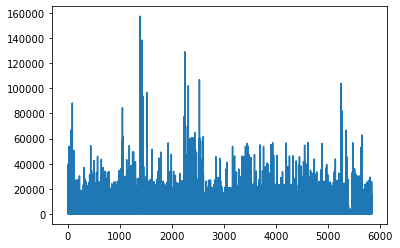

In [185]:
plt.plot(new1['RFR_ACH_IN_EA'])

<AxesSubplot:xlabel='PROD_CD'>

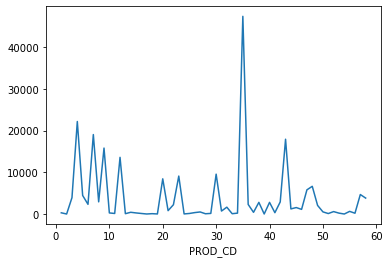

In [186]:
new1.groupby('PROD_CD')['TARGET_IN_EA'].mean().plot()

<AxesSubplot:xlabel='PROD_CD'>

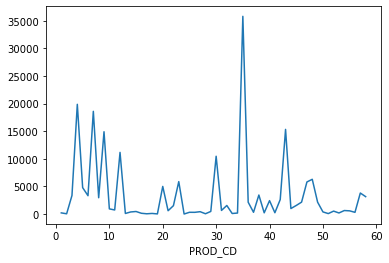

In [187]:
new1.groupby('PROD_CD')['RFR_ACH_IN_EA'].mean().plot()

<AxesSubplot:xlabel='PROD_CD', ylabel='TARGET_IN_EA'>

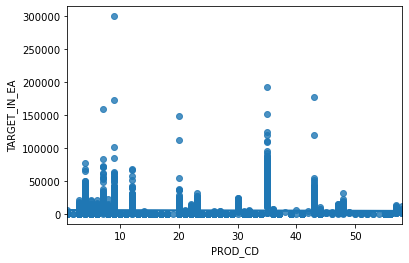

In [188]:
sns.regplot(x=new1['PROD_CD'],y=new1['TARGET_IN_EA'])

<AxesSubplot:xlabel='PROD_CD', ylabel='RFR_ACH_IN_EA'>

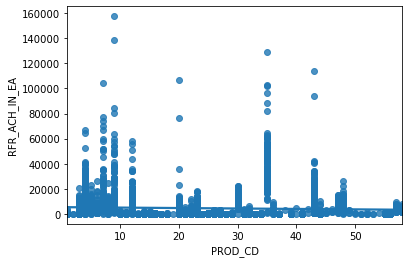

In [189]:
sns.regplot(x=new1['PROD_CD'],y=new1['RFR_ACH_IN_EA'])

<AxesSubplot:title={'center':'Target distribution'}, ylabel='Density'>

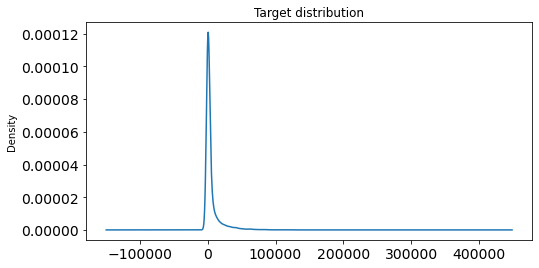

In [190]:
new1['TARGET_IN_EA'].plot(kind='density',title='Target distribution',fontsize=14,figsize=(8,4))

<AxesSubplot:title={'center':'Target distribution'}, ylabel='Density'>

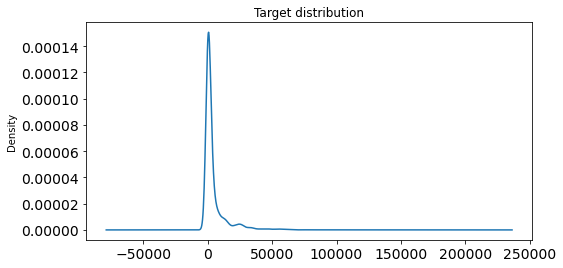

In [191]:
new1['RFR_ACH_IN_EA'].plot(kind='density',title='Target distribution',fontsize=14,figsize=(8,4))

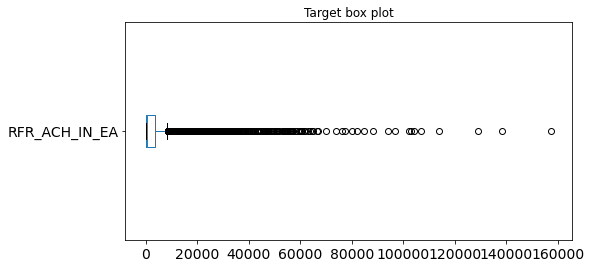

In [192]:
box_plot = new1['RFR_ACH_IN_EA'].plot(kind = 'box',vert = False,fontsize = 14,title = 'Target box plot',figsize = (8,4))

In [193]:
new1['RFR_ACH_IN_EA']=new1['RFR_ACH_IN_EA'].astype(int)

In [194]:
new1.head()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,RFR_ACH_IN_EA
0,18,1,1,2020,40,164
1,34,1,1,2020,240,224
2,1,1,1,2020,360,774
3,3,1,1,2020,12816,11018
4,4,1,1,2020,44460,39564


In [195]:
new1.tail()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,RFR_ACH_IN_EA
5834,44,108,1,2020,1008,832
5835,47,108,1,2020,3948,3555
5836,48,108,1,2020,4326,3413
5837,55,108,1,2020,936,803
5838,56,108,1,2020,48,312


In [224]:
new1.rename(columns={'RFR_ACH_IN_EA':'ACH_IN_EA'},inplace=True)

In [225]:
new1.head()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
0,18,1,1,2020,40,164
1,34,1,1,2020,240,224
2,1,1,1,2020,360,774
3,3,1,1,2020,12816,11018
4,4,1,1,2020,44460,39564


In [226]:
final_data1 = pd.concat([train1,new1],axis=0)

In [227]:
final_data1

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
0,23,1,10,2019,80,0
1,23,1,11,2019,80,0
2,23,1,12,2019,40,0
3,45,1,10,2019,160,211
4,45,1,11,2019,160,173
...,...,...,...,...,...,...
5834,44,108,1,2020,1008,832
5835,47,108,1,2020,3948,3555
5836,48,108,1,2020,4326,3413
5837,55,108,1,2020,936,803


In [228]:
final_data1.shape

(28308, 6)

In [229]:
final_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28308 entries, 0 to 5838
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   PROD_CD       28308 non-null  int64
 1   SLSMAN_CD     28308 non-null  int64
 2   PLAN_MONTH    28308 non-null  int64
 3   PLAN_YEAR     28308 non-null  int64
 4   TARGET_IN_EA  28308 non-null  int32
 5   ACH_IN_EA     28308 non-null  int32
dtypes: int32(2), int64(4)
memory usage: 1.3 MB


In [230]:
final_data1.describe()

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,TARGET_IN_EA,ACH_IN_EA
count,28308.000000,28308.000000,28308.000000,28308.000000,28308.000000,28308.000000
mean,32.983962,105.694927,8.968878,2019.206267,4106.393846,3893.384485
std,22.633760,64.474852,4.124582,0.404631,11355.023747,10548.797860
min,1.000000,1.000000,1.000000,2019.000000,0.000000,0.000000
25%,14.000000,49.000000,10.000000,2019.000000,40.000000,94.000000
50%,30.000000,102.000000,11.000000,2019.000000,300.000000,388.000000
75%,47.000000,161.000000,12.000000,2019.000000,2592.000000,2480.250000
max,86.000000,224.000000,12.000000,2020.000000,302400.000000,295578.000000


In [231]:
final_data1.isnull().sum()

PROD_CD         0
SLSMAN_CD       0
PLAN_MONTH      0
PLAN_YEAR       0
TARGET_IN_EA    0
ACH_IN_EA       0
dtype: int64

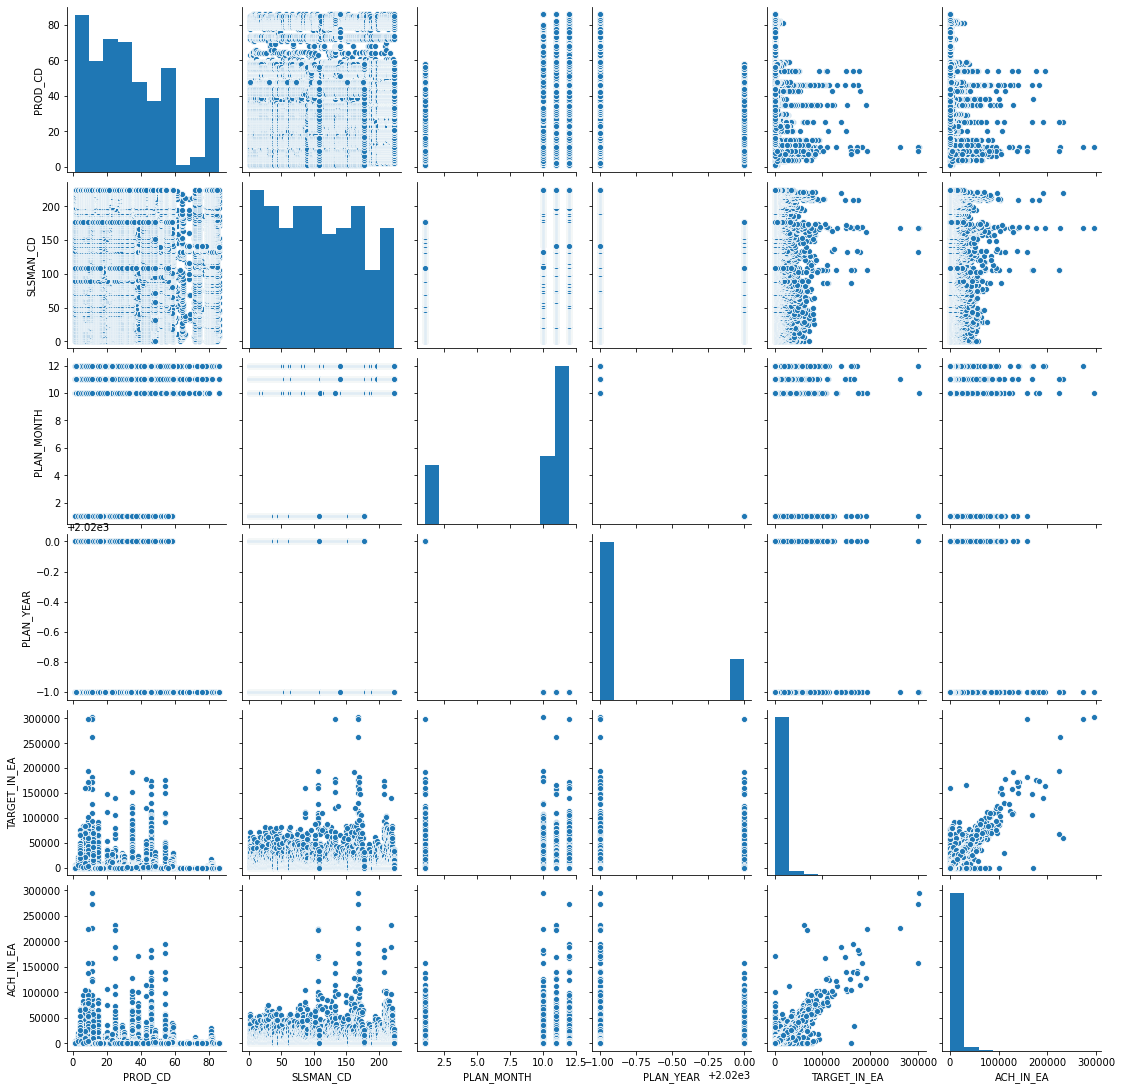

In [232]:
sns.pairplot(final_data1)

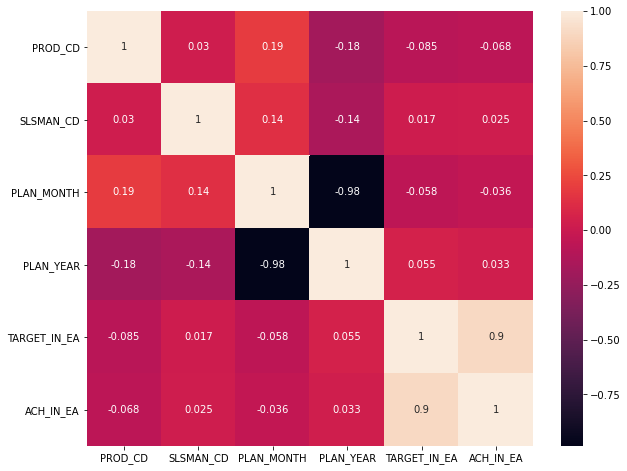

In [233]:
#### Correlation heatmap 

plt.figure(figsize=(10,8))
sns.heatmap(data=final_data1.corr(),annot=True)
plt.show()

<AxesSubplot:title={'center':'Target distribution'}, ylabel='Density'>

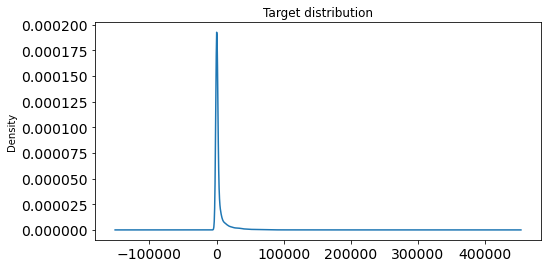

In [234]:
final_data1['TARGET_IN_EA'].plot(kind='density',title='Target distribution',fontsize=14,figsize=(8,4))

<AxesSubplot:title={'center':'Target distribution'}, ylabel='Density'>

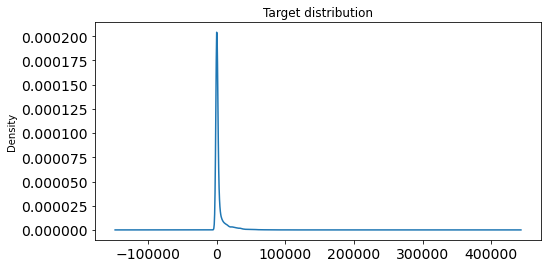

In [235]:
final_data1['ACH_IN_EA'].plot(kind='density',title='Target distribution',fontsize=14,figsize=(8,4))

<AxesSubplot:title={'center':'Log Target Distribution'}, ylabel='Density'>

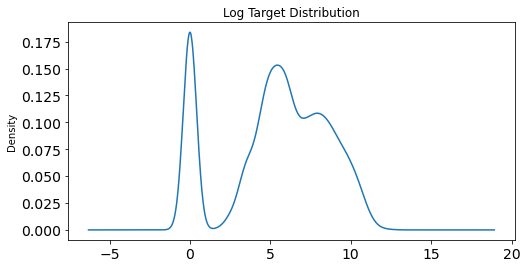

In [236]:
#### Seems like a normal distribution, we need a better visualization of this ####
pd.Series(np.log1p(final_data1['TARGET_IN_EA'])).plot(kind = 'density', title = 'Log Target Distribution', fontsize=14, figsize=(8,4))

<AxesSubplot:xlabel='PROD_CD'>

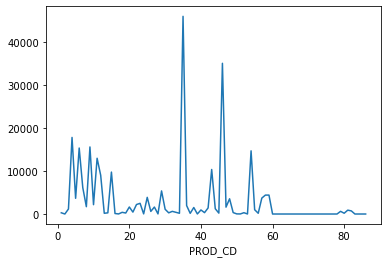

In [237]:
final_data1.groupby('PROD_CD')['TARGET_IN_EA'].mean().plot()

<AxesSubplot:xlabel='PROD_CD'>

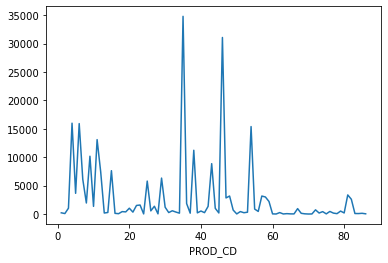

In [238]:
final_data1.groupby('PROD_CD')['ACH_IN_EA'].mean().plot()

<AxesSubplot:xlabel='SLSMAN_CD'>

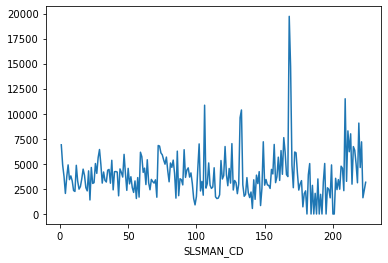

In [239]:
final_data1.groupby('SLSMAN_CD')['TARGET_IN_EA'].mean().plot()

<AxesSubplot:xlabel='SLSMAN_CD'>

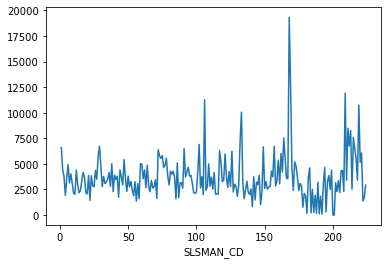

In [240]:
final_data1.groupby('SLSMAN_CD')['ACH_IN_EA'].mean().plot()

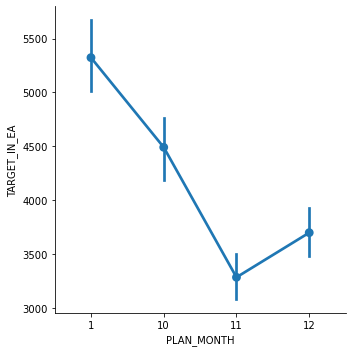

In [241]:
sns.factorplot(data = final_data1, x ="PLAN_MONTH", y = "TARGET_IN_EA")

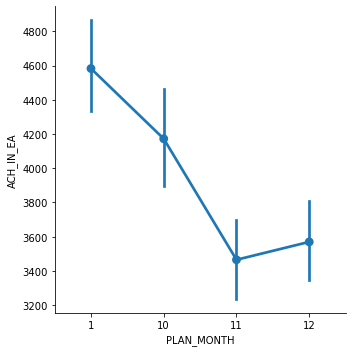

In [242]:
sns.factorplot(data = final_data1, x ="PLAN_MONTH", y = "ACH_IN_EA")

<AxesSubplot:xlabel='TARGET_IN_EA'>

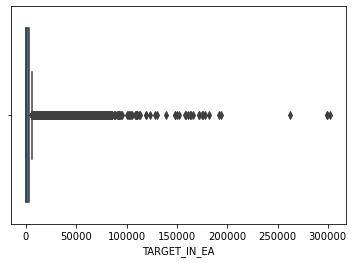

In [243]:
sns.boxplot(final_data1['TARGET_IN_EA'], data = final_data1)

<AxesSubplot:xlabel='ACH_IN_EA'>

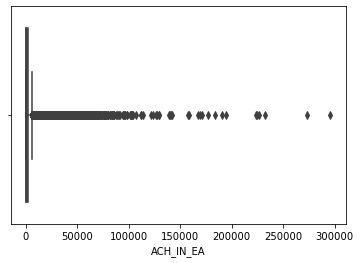

In [244]:
sns.boxplot(final_data1['ACH_IN_EA'], data = final_data1)

In [245]:
######### dividing X and Y from the dataset ########### 

A=final_data1.drop(['TARGET_IN_EA'],axis = 1)
B=final_data1['TARGET_IN_EA']
print(A.shape)
print(B.shape)
aData = A.values
bdata = B.values

(28308, 5)
(28308,)


In [246]:
A

,PROD_CD,SLSMAN_CD,PLAN_MONTH,PLAN_YEAR,ACH_IN_EA
0,23,1,10,2019,0
1,23,1,11,2019,0
2,23,1,12,2019,0
3,45,1,10,2019,211
4,45,1,11,2019,173
...,...,...,...,...,...
5834,44,108,1,2020,832
5835,47,108,1,2020,3555
5836,48,108,1,2020,3413
5837,55,108,1,2020,803


In [247]:
####### using skitlearn to split data into training and testing ############## 

from sklearn.model_selection import train_test_split
aTrain,aTest,bTrain,bTest = train_test_split(aData,bdata,test_size = 0.2, random_state = 42)

In [248]:
print("Shape of aTrain: ", aTrain.shape)
print("Shape of aTest: ", aTest.shape)
print("Shape of bTrain: ", bTrain.shape)
print("Shape of bTest: ", bTest.shape)

Shape of aTrain:  (22646, 5)
Shape of aTest:  (5662, 5)
Shape of bTrain:  (22646,)
Shape of bTest:  (5662,)


# Model Building using Linear Regression

In [249]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(aTrain,bTrain)
print(lr)

LinearRegression()


In [250]:
lr_score = lr.score(aTrain,bTrain)  
print("LinearModel Accuracy score: ", lr_score*100)
print("Intercept:",lr.intercept_)
print("Coefficient:",lr.coef_)

LinearModel Accuracy score:  81.92582815694954
Intercept: 858908.2566860581
Coefficient: [-8.83239303e+00 -5.24039897e-02 -1.03837497e+02 -4.24603069e+02
  9.67920645e-01]


In [251]:
lr_score1 = lr.score(aTest,bTest)
lr_score1

0.8080268791702745

In [252]:
b_pred = lr.predict(aTest)

In [253]:
print(b_pred)

[10942.3404862   1415.08561035   245.07519148 ...   820.08591195
   166.39349401  1567.44567801]


In [254]:
from sklearn import metrics
print('Linear Regression MAE:', metrics.mean_absolute_error(bTest,b_pred))
print('Linear Regression MSE:', metrics.mean_squared_error(bTest,b_pred))
print('Linear Regression RMSE:', np.sqrt(metrics.mean_squared_error(bTest,b_pred)))

Linear Regression MAE: 1637.0285280443532
Linear Regression MSE: 26469707.791302048
Linear Regression RMSE: 5144.8719897877


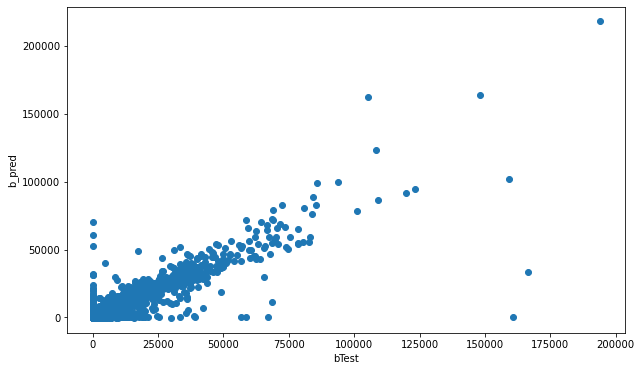

In [255]:
plt.figure(figsize=(10,6))
plt.scatter(bTest,b_pred)
plt.xlabel('bTest')
plt.ylabel('b_pred')
plt.show()

# Ridge Regression

In [256]:
from sklearn.linear_model import Ridge

In [257]:
LR_r1 = Ridge(alpha=0.5)
LR_r1.fit(aTrain,bTrain)
print(LR_r1)

Ridge(alpha=0.5)


In [259]:
y_pred11 = LR_r1.predict(aTest)

In [260]:
LR_r1_score = LR_r1.score(aTrain,bTrain)  
print("LinearModel Accuracy score: ", LR_r1_score*100)
print("Intercept:",LR_r1.intercept_)
print("Coefficient:",LR_r1.coef_)

LinearModel Accuracy score:  81.92582814220583
Intercept: 854959.0079814111
Coefficient: [-8.83258407e+00 -5.23662611e-02 -1.03648267e+02 -4.22648067e+02
  9.67920769e-01]


In [261]:
LR_r1.score(aTest,bTest)

0.808027054694018

In [262]:
from sklearn import metrics
print('Linear Regression MAE:', metrics.mean_absolute_error(bTest,y_pred11))
print('Linear Regression MSE:', metrics.mean_squared_error(bTest,y_pred11))
print('Linear Regression RMSE:', np.sqrt(metrics.mean_squared_error(bTest,y_pred11)))

Linear Regression MAE: 1637.0131100754936
Linear Regression MSE: 26469683.58967329
Linear Regression RMSE: 5144.8696377724955


# Applying RandomForestRegressor¶

In [314]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False) 


In [315]:
RFR.fit(aTrain,bTrain)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=5000, n_jobs=1,
                      random_state=0)

In [316]:
RFR_pred = RFR.predict(aTest)             

In [317]:
RFR.score(aTrain,bTrain)

0.9612042049525411

In [318]:
RFR.score(aTest,bTest)

0.886664341406114

In [319]:
print('Random Forest Regression MAE:', metrics.mean_absolute_error(bTest, RFR_pred))
print('Random Forest Regression MSE:', metrics.mean_squared_error(bTest, RFR_pred))
print('Random Forest Regression RMSE:', np.sqrt(metrics.mean_squared_error(bTest, RFR_pred)))

Random Forest Regression MAE: 997.3205987698448
Random Forest Regression MSE: 15626988.571883509
Random Forest Regression RMSE: 3953.0986038655183


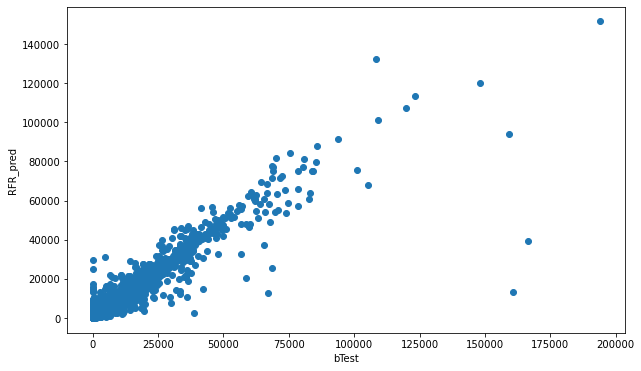

In [320]:
plt.figure(figsize=(10,6))
plt.scatter(bTest,RFR_pred)
plt.xlabel('bTest')
plt.ylabel('RFR_pred')
plt.show()

<AxesSubplot:>

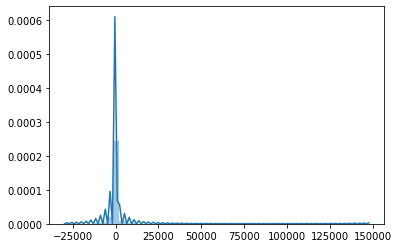

In [321]:
sns.distplot(bTest-RFR_pred)

# RandomForest with RandomizedSearchedCV

In [271]:
############# Hyper parameter tunning ############## 

from sklearn.model_selection import RandomizedSearchCV

##### no. of trees in the random forest 
n_estimators = [int(x) for x in np.linspace(start = 100, stop =800 , num = 8)]

####### no. of features to consider in every split #########

max_features = ['auto','sqrt']

###### max no. of levels in tree########### 

max_depth = [int(x) for x in np.linspace(5,30, num = 6)]

##### min. no of samples required to split a node ######## 

min_samples_split = [2,5,10,15,100]

####### min no. of samples required at each leaf node ####### 

min_samples_leaf = [1,2,5,10]

In [272]:
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf}

In [273]:
RF_random = RandomizedSearchCV(estimator = RFR,param_distributions= random_grid,scoring='neg_mean_squared_error',n_iter = 10, cv =5,verbose=2,random_state=42,n_jobs=1)
RF_random.fit(aTrain,bTrain)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=  32.2s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   32.2s remaining:    0.0s


[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=  31.1s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=  30.3s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=  30.4s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=  29.8s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=  22.9s
[CV] n_estimators=400, min_samples_split=10, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 23.0min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=30,
                                                   max_features='sqrt',
                                                   min_samples_leaf=2,
                                                   min_samples_split=5,
                                                   n_estimators=2500, n_jobs=1,
                                                   random_state=0),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700

In [274]:
RF_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [275]:
RFR_pred1 = RF_random.predict(aTest)
RFR_pred1

array([11809.67657143,  1034.65465755,   264.16328039, ...,
         531.98585714,    19.64239574,  1318.95549722])

In [276]:
print('Hyper parameter RandomForest MAE:',metrics.mean_absolute_error(bTest,RFR_pred1))
print('Hyper parameter RandomForest MSE:',metrics.mean_squared_error(bTest,RFR_pred1))
print('Hyper parameter RandomForest RMsE:',np.sqrt(metrics.mean_squared_error(bTest,RFR_pred1)))

Hyper parameter RandomForest MAE: 977.7866628451384
Hyper parameter RandomForest MSE: 15399708.321117314
Hyper parameter RandomForest RMsE: 3924.2462105629043


<AxesSubplot:>

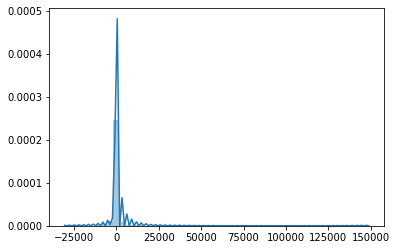

In [277]:
sns.distplot(bTest-RFR_pred1)

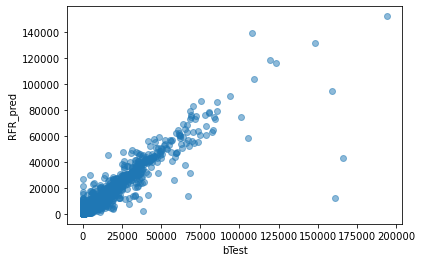

In [278]:
plt.scatter(bTest,RFR_pred1,alpha=0.5)
plt.xlabel("bTest")
plt.ylabel("RFR_pred")
plt.show()

# Applying XGBoost Regressor

In [307]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
XGB = XGBRegressor()
parameters = {'objective':['reg:squarederror'],'learning_rate':[0.1],'max_depth':[3],'min_child_weight':[2],'subsample':[0.7],
              'colsample_bytree':[0.7],'colsample_bylevel':[0.7],'alpha':[0.05],'lambda':[0.3],'n_estimators':[1500]}
XGB1 = GridSearchCV(XGB,parameters,cv=5)
XGB1.fit(aTrain,bTrain)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             pa

In [308]:
XGB_score = XGB1.score(aTrain,bTrain)
print('Training score:',XGB_score*100)

Training score: 96.0195852326202


In [309]:
XGB1.score(aTest,bTest)

0.8730154154631007

In [310]:
XGB_pred = XGB1.predict(aTest)
XGB_pred

array([10459.973  ,  1107.337  ,   220.64937, ...,   263.32977,
         -19.75537,   535.82324], dtype=float32)

In [311]:
print('XGBoost MAE:', metrics.mean_absolute_error(bTest, XGB_pred))
print('XGBoost MSE:', metrics.mean_squared_error(bTest, XGB_pred))
print('XGBoost RMSE:', np.sqrt(metrics.mean_squared_error(bTest, XGB_pred)))

XGBoost MAE: 1294.2783635824824
XGBoost MSE: 17508934.751719456
XGBoost RMSE: 4184.367903485479


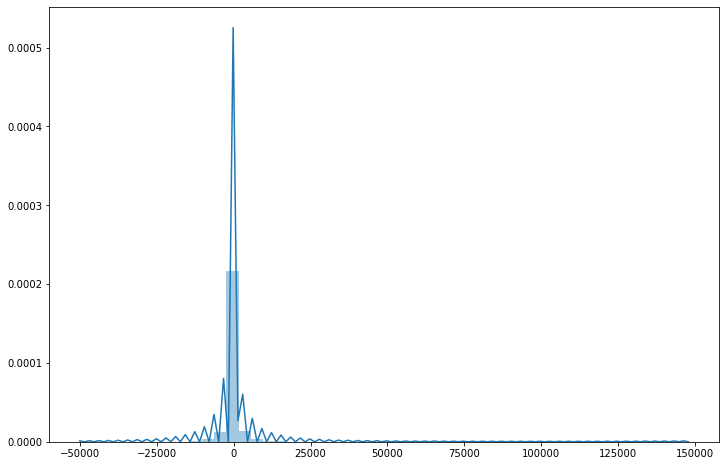

In [312]:
plt.figure(figsize=(12,8))
sns.distplot(bTest-XGB_pred)
plt.show()

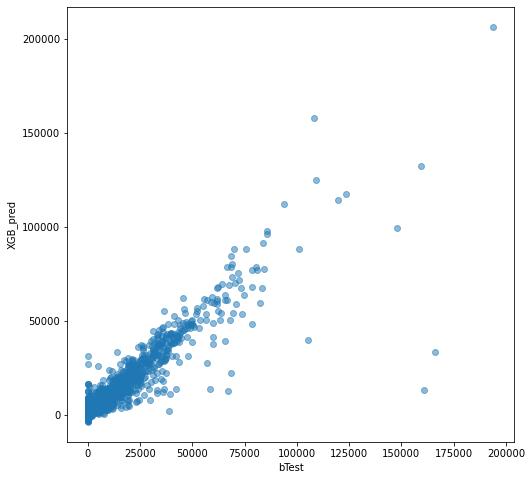

In [313]:
plt.figure(figsize=(8,8))
plt.scatter(bTest,XGB_pred,alpha=0.5)
plt.xlabel("bTest")
plt.ylabel("XGB_pred")
plt.show()

# Applying Gradient Boosting algorithm

In [286]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, r2_score

In [300]:
params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls'}
GBR = ensemble.GradientBoostingRegressor(**params)

GBR.fit(aTrain, bTrain)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, n_estimators=1000)

In [301]:
GBR_pred=GBR.predict(aTest)
GBR_pred

array([10879.19694849,   122.6541548 ,   239.45431557, ...,
         202.57827959,    44.13577301,  1684.355976  ])

In [302]:
GBR_score = GBR.score(aTrain,bTrain)  
print("GradientBoostingRegressor Accuracy score: ", GBR_score*100)

GradientBoostingRegressor Accuracy score:  97.35057492199782


In [303]:
GBR.score(aTest,bTest)  

0.8920675370351947

In [304]:
print('Gradient Boosting Regression MAE:', metrics.mean_absolute_error(bTest, GBR_pred))
print('Gradient Boosting Regression MSE:', metrics.mean_squared_error(bTest, GBR_pred))
print('Gradient Boosting Regression RMSE:', np.sqrt(metrics.mean_squared_error(bTest, GBR_pred)))

Gradient Boosting Regression MAE: 1101.4832899942655
Gradient Boosting Regression MSE: 14881983.183510093
Gradient Boosting Regression RMSE: 3857.7173540203917


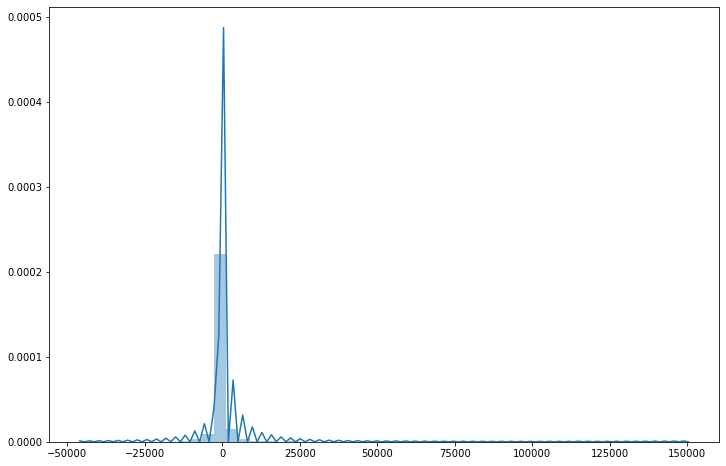

In [305]:
plt.figure(figsize=(12,8))
sns.distplot(bTest-GBR_pred)
plt.show() 

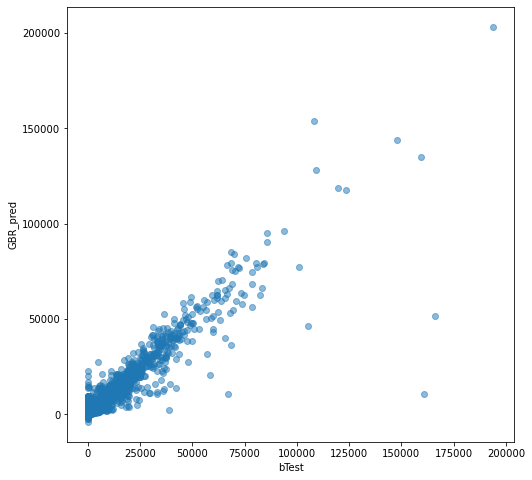

In [306]:
plt.figure(figsize=(8,8))
plt.scatter(bTest,GBR_pred,alpha=0.5)
plt.xlabel("bTest")
plt.ylabel("GBR_pred")
plt.show()

In [295]:
catb=CatBoostRegressor(iterations=500, depth=3, learning_rate=0.1, loss_function='RMSE')
catb.fit(aTrain,bTrain)

0:	learn: 10505.3481050	total: 102ms	remaining: 50.8s
1:	learn: 9825.2681988	total: 117ms	remaining: 29.2s
2:	learn: 9227.0466544	total: 132ms	remaining: 21.9s
3:	learn: 8698.2774733	total: 144ms	remaining: 17.8s
4:	learn: 8229.9828036	total: 153ms	remaining: 15.2s
5:	learn: 7824.2058666	total: 163ms	remaining: 13.4s
6:	learn: 7479.0421072	total: 173ms	remaining: 12.2s
7:	learn: 7172.4094923	total: 182ms	remaining: 11.2s
8:	learn: 6918.8258720	total: 191ms	remaining: 10.4s
9:	learn: 6682.6571622	total: 201ms	remaining: 9.87s
10:	learn: 6483.9767843	total: 211ms	remaining: 9.37s
11:	learn: 6308.0134149	total: 221ms	remaining: 9s
12:	learn: 6156.9836837	total: 230ms	remaining: 8.62s
13:	learn: 6027.1778162	total: 239ms	remaining: 8.3s
14:	learn: 5925.8373758	total: 356ms	remaining: 11.5s
15:	learn: 5831.2088288	total: 363ms	remaining: 11s
16:	learn: 5744.7387894	total: 371ms	remaining: 10.5s
17:	learn: 5674.5918725	total: 379ms	remaining: 10.2s
18:	learn: 5612.0838056	total: 389ms	remain

In [296]:
catb_pred = catb.predict(aTest)
catb_pred

array([10450.4563967 ,  1807.47548159,   156.80012244, ...,
        -869.81220458,   212.87587324,  1781.09568966])

In [297]:
catb.score(aTrain,bTrain)

0.8994906881776609

In [298]:
catb.score(aTest,bTest)

0.8299999263216522

In [299]:
print('CAT Boosting Regression MAE:', metrics.mean_absolute_error(bTest, catb_pred))
print('CAT Boosting Regression MSE:', metrics.mean_squared_error(bTest, catb_pred))
print('CAT Boosting Regression RMSE:', np.sqrt(metrics.mean_squared_error(bTest, catb_pred)))

CAT Boosting Regression MAE: 1339.8328597627283
CAT Boosting Regression MSE: 23440012.09813598
CAT Boosting Regression RMSE: 4841.488624187397
